<a href="https://colab.research.google.com/github/everythingapplejj/Research-Graph-Embeddings-/blob/JJ/mcmc_samples_with_Data_cleaning_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git


[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [202]:
# this version is without the VID

In [203]:

# this program is with the pre_data cleaning :)
# Duplicated nodes from the node_list and adj_matrix will be removed
# This google colab includes the methodology for graph embeddings. And removing the subgraphs.

In [204]:
accuracy_collector = []

In [205]:
print("Welcome to Graph Embeddings!")

Welcome to Graph Embeddings!


In [206]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#testing visualization
#Implementation by Jiwoong Jung
import torch

#placeholder values:

# Print information about the dataset


# Visualization
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 24})
from torch_geometric.utils import to_networkx
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
"""
Created on Wed Aug 23 12:22:38 2023

@author: vishalr
"""

# we can use the node labels for the first set of the x values
# figure out ways to include diff files for the y_features (1st priority)
# for now, do the y label first,
# later consider the edge features and node features

import pandas as pd
import pickle
import numpy as np


#change this to the folder where you store your data
data_dir = ""

#each of the two data frames below have 20,000 rows, each corresponding to one sample from the original graph
#each sample consists of 21 nodes; node_labels contains the names of these 21 nodes of the form Vxyz
#each node is a DNA fragment of length 500 bases; so Vxyz coveres region [500*xyz, 500*xyz+500)
#adjacency_matrix has the flattended adjacecny matrix for each of these 20,000 samples
#so each row is of dimension 21*21 = 441


#node_labels = np.load(data_dir+'df_chr2R_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot_sample_node_matrix.npy')

#adjacency_matrix = np.load(data_dir+'df_chr2R_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot.npy')

worklist_node_labels = []
worklist_adjacency_matrix = []

#importing the rest of the files
# 2L = 0; 2R = 1; 3L = 2, 3R = 3

node_labels_2L = np.load(data_dir+'df_chr2L_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot_sample_node_matrix.npy')
adjacency_matrix_2L = np.load(data_dir+'df_chr2L_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot.npy')

worklist_node_labels.append(node_labels_2L)
worklist_adjacency_matrix.append(adjacency_matrix_2L)

node_labels_2R = np.load(data_dir+'df_chr2R_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot_sample_node_matrix.npy')
adjacency_matrix_2R = np.load(data_dir+'df_chr2R_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot.npy')

worklist_node_labels.append(node_labels_2R)
worklist_adjacency_matrix.append(adjacency_matrix_2R)

node_labels_3L = np.load(data_dir+'df_chr3L_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot_sample_node_matrix.npy')
adjacency_matrix_3L = np.load(data_dir+'df_chr3L_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot.npy')

worklist_node_labels.append(node_labels_3L)
worklist_adjacency_matrix.append(adjacency_matrix_3L)

node_labels_3R = np.load(data_dir+'df_chr3R_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot_sample_node_matrix.npy')
adjacency_matrix_3R = np.load(data_dir+'df_chr3R_drosophila_ChIA_Drop_0.1_PASS_20000_MCMC_pivot.npy')


worklist_node_labels.append(node_labels_3R)
worklist_adjacency_matrix.append(adjacency_matrix_3R)

In [207]:
import numpy as np
print(worklist_node_labels)

[array([[ 5997, 19835,   969, ...,  4455, 27017, 27025],
       [41207, 22040, 41207, ...,   135,   186,   153],
       [13615, 16412, 16377, ..., 41754, 41780, 41767],
       ...,
       [39599,  9995, 38842, ..., 33868, 20856, 14348],
       [39954,  9995, 10131, ...,  2117,  2259,  2251],
       [32509, 19793, 19783, ...,  7313, 42107, 41499]]), array([[34307, 23565,  5042, ...,  5114, 12844, 12993],
       [36450, 36179, 36450, ..., 22359, 28058, 30979],
       [36450, 36179, 33947, ...,  9673, 20209, 12537],
       ...,
       [ 7427, 39513, 19626, ..., 25109, 25119, 27062],
       [33656, 20125, 24230, ..., 28043, 29127, 29091],
       [ 8127, 38554,  7700, ..., 24445, 25489,  3057]]), array([[41331,  1284,  1255, ..., 32082, 18737, 18660],
       [ 1284,  1349,  1363, ...,  3939,  5692, 17395],
       [24386,  5147, 32020, ..., 28096,  6446, 41308],
       ...,
       [ 3375, 19321,  1419, ..., 17371, 28421, 17371],
       [44210,  1306,  3592, ..., 11490,  1774, 35930],
       

In [208]:
print(worklist_adjacency_matrix)

[array([[ 0.,  1.,  1., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       ...,
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.]]), array([[ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  1., ...,  1.,  0., -1.],
       ...,
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  1., ...,  1.,  0., -1.]]), array([[ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       ...,
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.]]), array([[ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       [ 0.,  1.,  0., ...,  1.,  0., -1.],
       ...,
       [ 0.,  1.,  0.

In [209]:
for i in range(0,len(worklist_adjacency_matrix)):
  worklist_adjacency_matrix[i] = worklist_adjacency_matrix[i][:,:-1]
#adjacency_matrix = adjacency_matrix[:,:-1]

In [210]:
print(worklist_adjacency_matrix)

[array([[0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]]), array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.]]), array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]]), array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.]])]


In [211]:
'''
rep_A = {}
rep_graph_indicator = []
rep_graph_labels = []
rep_node_labels = []
rep_node_attributes = []
rep_edge_attributes = []
'''


'\nrep_A = {}\nrep_graph_indicator = []\nrep_graph_labels = []\nrep_node_labels = []\nrep_node_attributes = []\nrep_edge_attributes = []\n'

In [212]:
# proceeding with data cleaning:
'''

import numpy as np
def remove_duplicates(node_labels, adj_matrix):
  sample_nodes = node_labels
  sample_adj_matrix = adj_matrix
  i = 0
  j = i + 1
  while(i < len(sample_nodes) - 1):
    if(sample_nodes[i] == sample_nodes[j]):
      sample_nodes = np.delete(sample_nodes,j)
      sample_adj_matrix = np.delete(np.delete(sample_adj_matrix, j, 0), j, 1)
      if(j >= len(sample_nodes)):
        i = i + 1
        j = i + 1
      continue
    else:
      j = j + 1
      if(j >= len(sample_nodes)):
        i = i + 1
        j = i + 1
  return sample_nodes, sample_adj_matrix
'''


import numpy as np

def remove_duplicates(node_labels, adj_matrix, node_removed):
    seen = {}
    indices_to_remove = []

    for i, node in enumerate(node_labels):
        if node in seen:
            indices_to_remove.append(i)
            node_removed.add(node)
            '''
        elif (node in node_removed):
            indices_to_remove.append(i)
            '''
        else:
            seen[node] = i

    unique_nodes = np.delete(node_labels, indices_to_remove)
    unique_adj_matrix = np.delete(np.delete(adj_matrix, indices_to_remove, axis=0), indices_to_remove, axis=1)

    return unique_nodes, unique_adj_matrix, node_removed


In [213]:
print(worklist_node_labels[0])
print(worklist_node_labels[1])

[[ 5997 19835   969 ...  4455 27017 27025]
 [41207 22040 41207 ...   135   186   153]
 [13615 16412 16377 ... 41754 41780 41767]
 ...
 [39599  9995 38842 ... 33868 20856 14348]
 [39954  9995 10131 ...  2117  2259  2251]
 [32509 19793 19783 ...  7313 42107 41499]]
[[34307 23565  5042 ...  5114 12844 12993]
 [36450 36179 36450 ... 22359 28058 30979]
 [36450 36179 33947 ...  9673 20209 12537]
 ...
 [ 7427 39513 19626 ... 25109 25119 27062]
 [33656 20125 24230 ... 28043 29127 29091]
 [ 8127 38554  7700 ... 24445 25489  3057]]


In [214]:
#next

In [215]:
#placeholder logics

import torch
from torch_geometric.data import Data, InMemoryDataset
from torch_geometric.utils import from_scipy_sparse_matrix
import scipy.sparse as sp
import numpy as np

class MyCustomDataset(InMemoryDataset):
    def __init__(self, data_list, transform=None, pre_transform=None):
        self.data_list = data_list
        super(MyCustomDataset, self).__init__(None, transform, pre_transform)
        self.data, self.slices = self.collate(data_list)

    @property
    def raw_file_names(self):
        return []

    @property
    def processed_file_names(self):
        return []

    def download(self):
        pass

    def process(self):
        pass

    def len(self):
        return len(self.data_list)

    def get(self, idx):
        return self.data_list[idx]

#where can I consider the node_features?
dataset = []
#worklist_edge_attr = []
#y = np.array([1])
#y = torch.from_numpy(y).type(torch.LongTensor)
counter = 0
label_number = 0
edge_placeholder = 0;
for adjacency_matrix in worklist_adjacency_matrix:
  y = np.array([label_number])
  y = torch.from_numpy(y).type(torch.LongTensor)
  test = set()
  for graph in adjacency_matrix:
    sample_graph = graph.reshape(21, 21) # fix the reshaping
    sample_node = worklist_node_labels[label_number][counter]
    sample_node, sample_graph, test = remove_duplicates(sample_node, sample_graph, test)
    temp_sample_node = np.array([])
    for i in range(0, len(sample_node)):
      temp_sample_node = np.append(temp_sample_node, i)
    #node_indices = torch.arange(sample.shape[0], dtype=torch.float).view(-1, 1)
    sample_node_labels = torch.from_numpy(temp_sample_node).type(torch.FloatTensor).view(-1,1) #change this node_label
    #print(sample_node_labels)
    #x = node_indices #testing...
    x = sample_node_labels
    #print(y) # testing to see if the labels work
    adj_matrix = sp.coo_matrix(sample_graph)
    edge_index, edge_attr = from_scipy_sparse_matrix(adj_matrix)
    edge_placeholder = edge_attr
    #worklist_edge_attr.append(edge_attr)
    #y = torch.from_numpy(node_labels[counter]).type(torch.LongTensor)
    data = Data(x=x, edge_index=edge_index, y = y)
    dataset.append(data)
    counter = counter + 1
  print(len(test))
  print(test)
  counter = 0
  label_number = label_number + 1

dataset = MyCustomDataset(dataset).shuffle()

# Example: Accessing the first graph in the custom dataset
print(dataset[20000])
print("Number of Nodes (x):")
print(dataset[0].x)
# the node features are vacant for now
print("Edge index:")
print(dataset[0].edge_index)
print("Labels (y):")
print(dataset.y)
print(len(dataset))

9917
{32768, 32774, 32777, 14, 32786, 32787, 18, 32789, 32788, 19, 26, 32794, 27, 31, 32800, 32801, 32802, 33, 35, 38, 32806, 39, 32809, 41, 32811, 32812, 42, 32807, 32819, 32821, 32822, 32823, 58, 61, 32830, 32831, 63, 32833, 32834, 32835, 70, 32839, 32841, 74, 32842, 32846, 82, 32851, 32854, 87, 32855, 32857, 32858, 32859, 92, 91, 94, 93, 32864, 32863, 32866, 32869, 32870, 32872, 32873, 32874, 107, 32881, 113, 118, 32886, 32888, 32889, 32890, 120, 32891, 32893, 32894, 32895, 32896, 32897, 32898, 129, 32900, 32901, 132, 135, 136, 32905, 32903, 32902, 32908, 32906, 139, 32911, 138, 145, 146, 147, 148, 149, 150, 151, 32917, 153, 32922, 155, 32923, 32925, 32921, 159, 32928, 161, 162, 154, 32926, 166, 167, 170, 171, 172, 173, 174, 32941, 175, 176, 179, 182, 183, 184, 185, 186, 32954, 32956, 189, 190, 191, 192, 193, 196, 197, 198, 199, 200, 201, 32970, 203, 204, 205, 206, 207, 208, 209, 210, 211, 32980, 213, 32981, 32983, 32984, 216, 32986, 219, 32987, 32989, 32988, 220, 218, 32993, 226, 3

Processing...
Done!


Data(x=[17, 1], edge_index=[2, 42], y=[1])
Number of Nodes (x):
tensor([[ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.]])
Edge index:
tensor([[ 0,  0,  1,  1,  2,  2,  2,  2,  2,  3,  3,  4,  4,  5,  5,  5,  6,  6,
          7,  7,  7,  8,  8,  9,  9,  9, 10, 10, 10, 11, 11, 12, 12, 12, 12, 13,
         14, 14, 15, 15, 15, 16],
        [ 1,  2,  0,  2,  0,  1,  3,  4,  5,  2,  4,  2,  3,  2,  6,  7,  5,  7,
          5,  6,  8,  7,  9,  8, 10, 11,  9, 11, 12,  9, 10, 10, 13, 14, 15, 12,
         12, 15, 12, 14, 16, 15]])
Labels (y):
tensor([3, 2, 1,  ..., 3, 1, 2])
80000


In [158]:
print(dataset[10100].x)
print(dataset[20000].x)
print(dataset[30000].x)
print(dataset[40000].x)
print(dataset[50000].x)

tensor([[ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.]])
tensor([[ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.]])
tensor([[ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.]])
tensor([[ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.]])
tensor([[ 0.],
      

In [159]:
print(f'Sample Edge_Attr: {edge_placeholder}') #every Edge_Attr is 1 for now.?

Sample Edge_Attr: tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       dtype=torch.float64)


In [160]:
print(dataset[20000])
print(dataset[0])
print(dataset[10000])
print(dataset[70000])
print(dataset[len(dataset) - 1])

Data(x=[15, 1], edge_index=[2, 30], y=[1])
Data(x=[16, 1], edge_index=[2, 34], y=[1])
Data(x=[19, 1], edge_index=[2, 38], y=[1])
Data(x=[17, 1], edge_index=[2, 34], y=[1])
Data(x=[18, 1], edge_index=[2, 42], y=[1])


In [161]:
#testing the visualization of the graph

def graph_visuals(data_input):
  G = to_networkx(data_input, to_undirected=True)

# 3D spring layout
  pos = nx.spring_layout(G, dim=3, seed=0)

# Extract node and edge positions from the layout
  node_xyz = np.array([pos[v] for v in sorted(G)])
  edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])

# Create the 3D figure
  fig = plt.figure(figsize=(16,16))
  ax = fig.add_subplot(111, projection="3d")

# Suppress tick labels
  for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
      dim.set_ticks([])

# Plot the nodes - alpha is scaled by "depth" automatically
  ax.scatter(*node_xyz.T, s=500, c="#0A047A")

# Plot the edges
  for vizedge in edge_xyz:
      ax.plot(*vizedge.T, color="tab:gray")

# fig.tight_layout()
  plt.show()



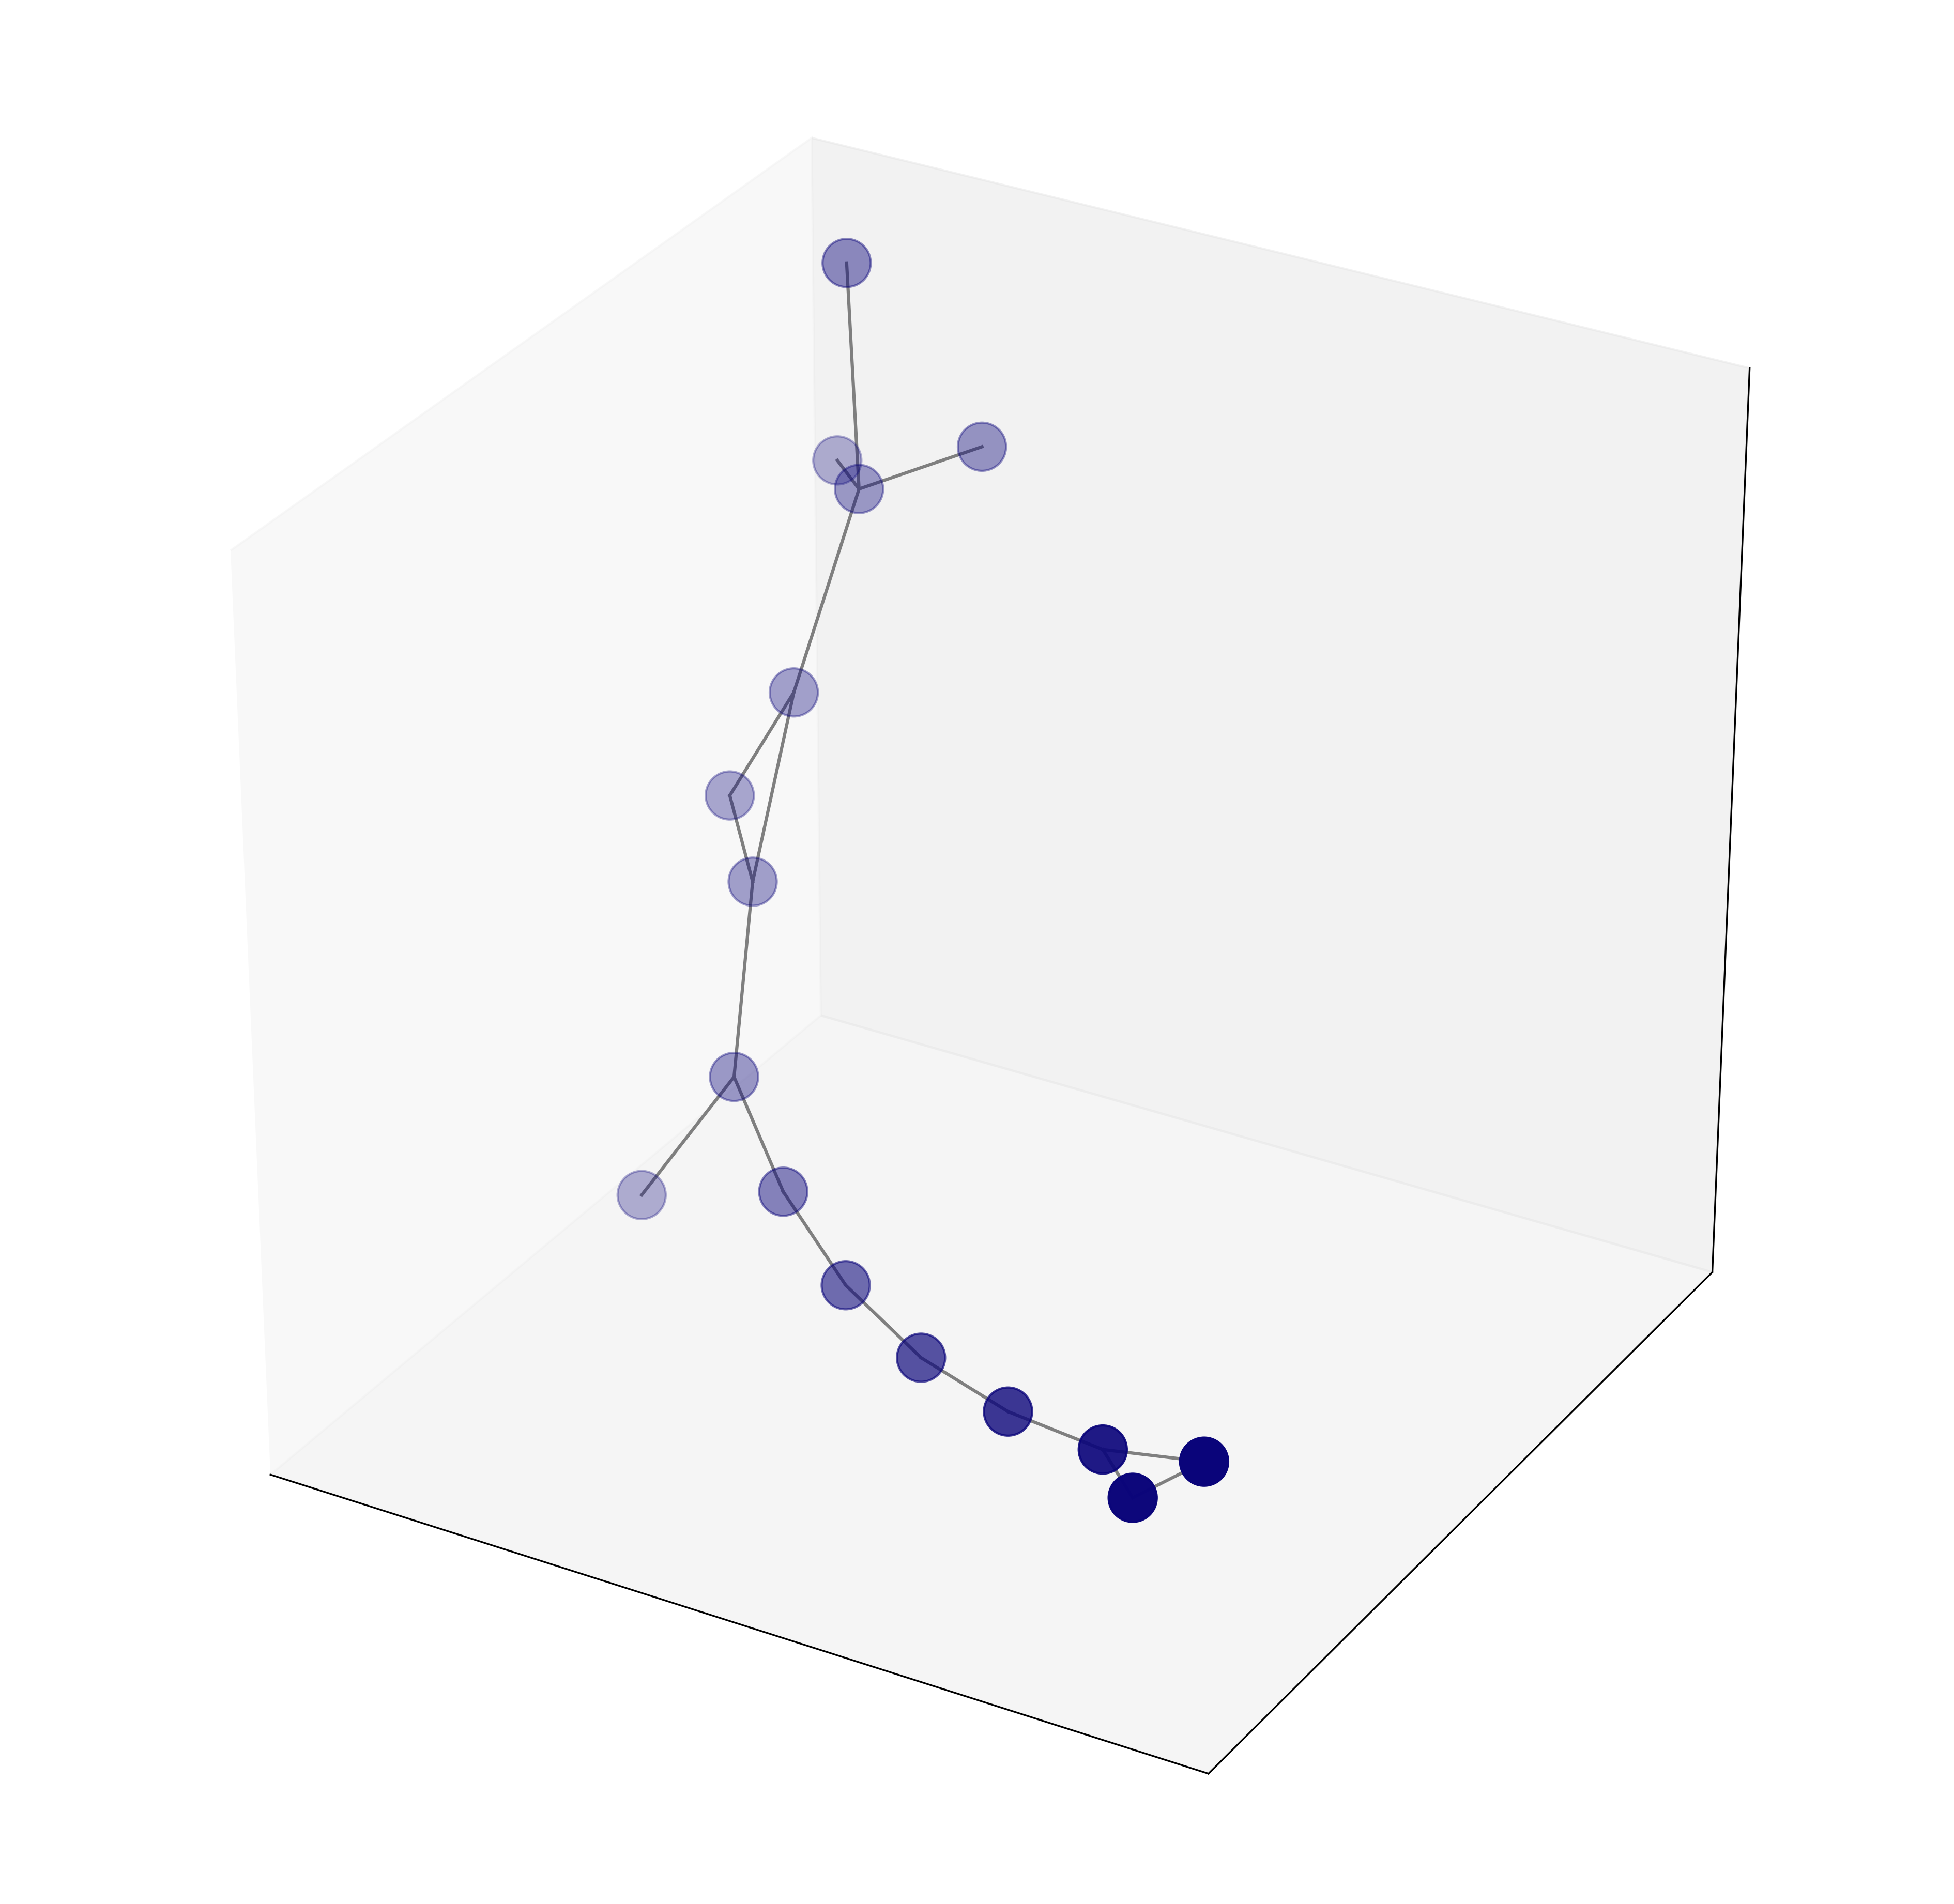

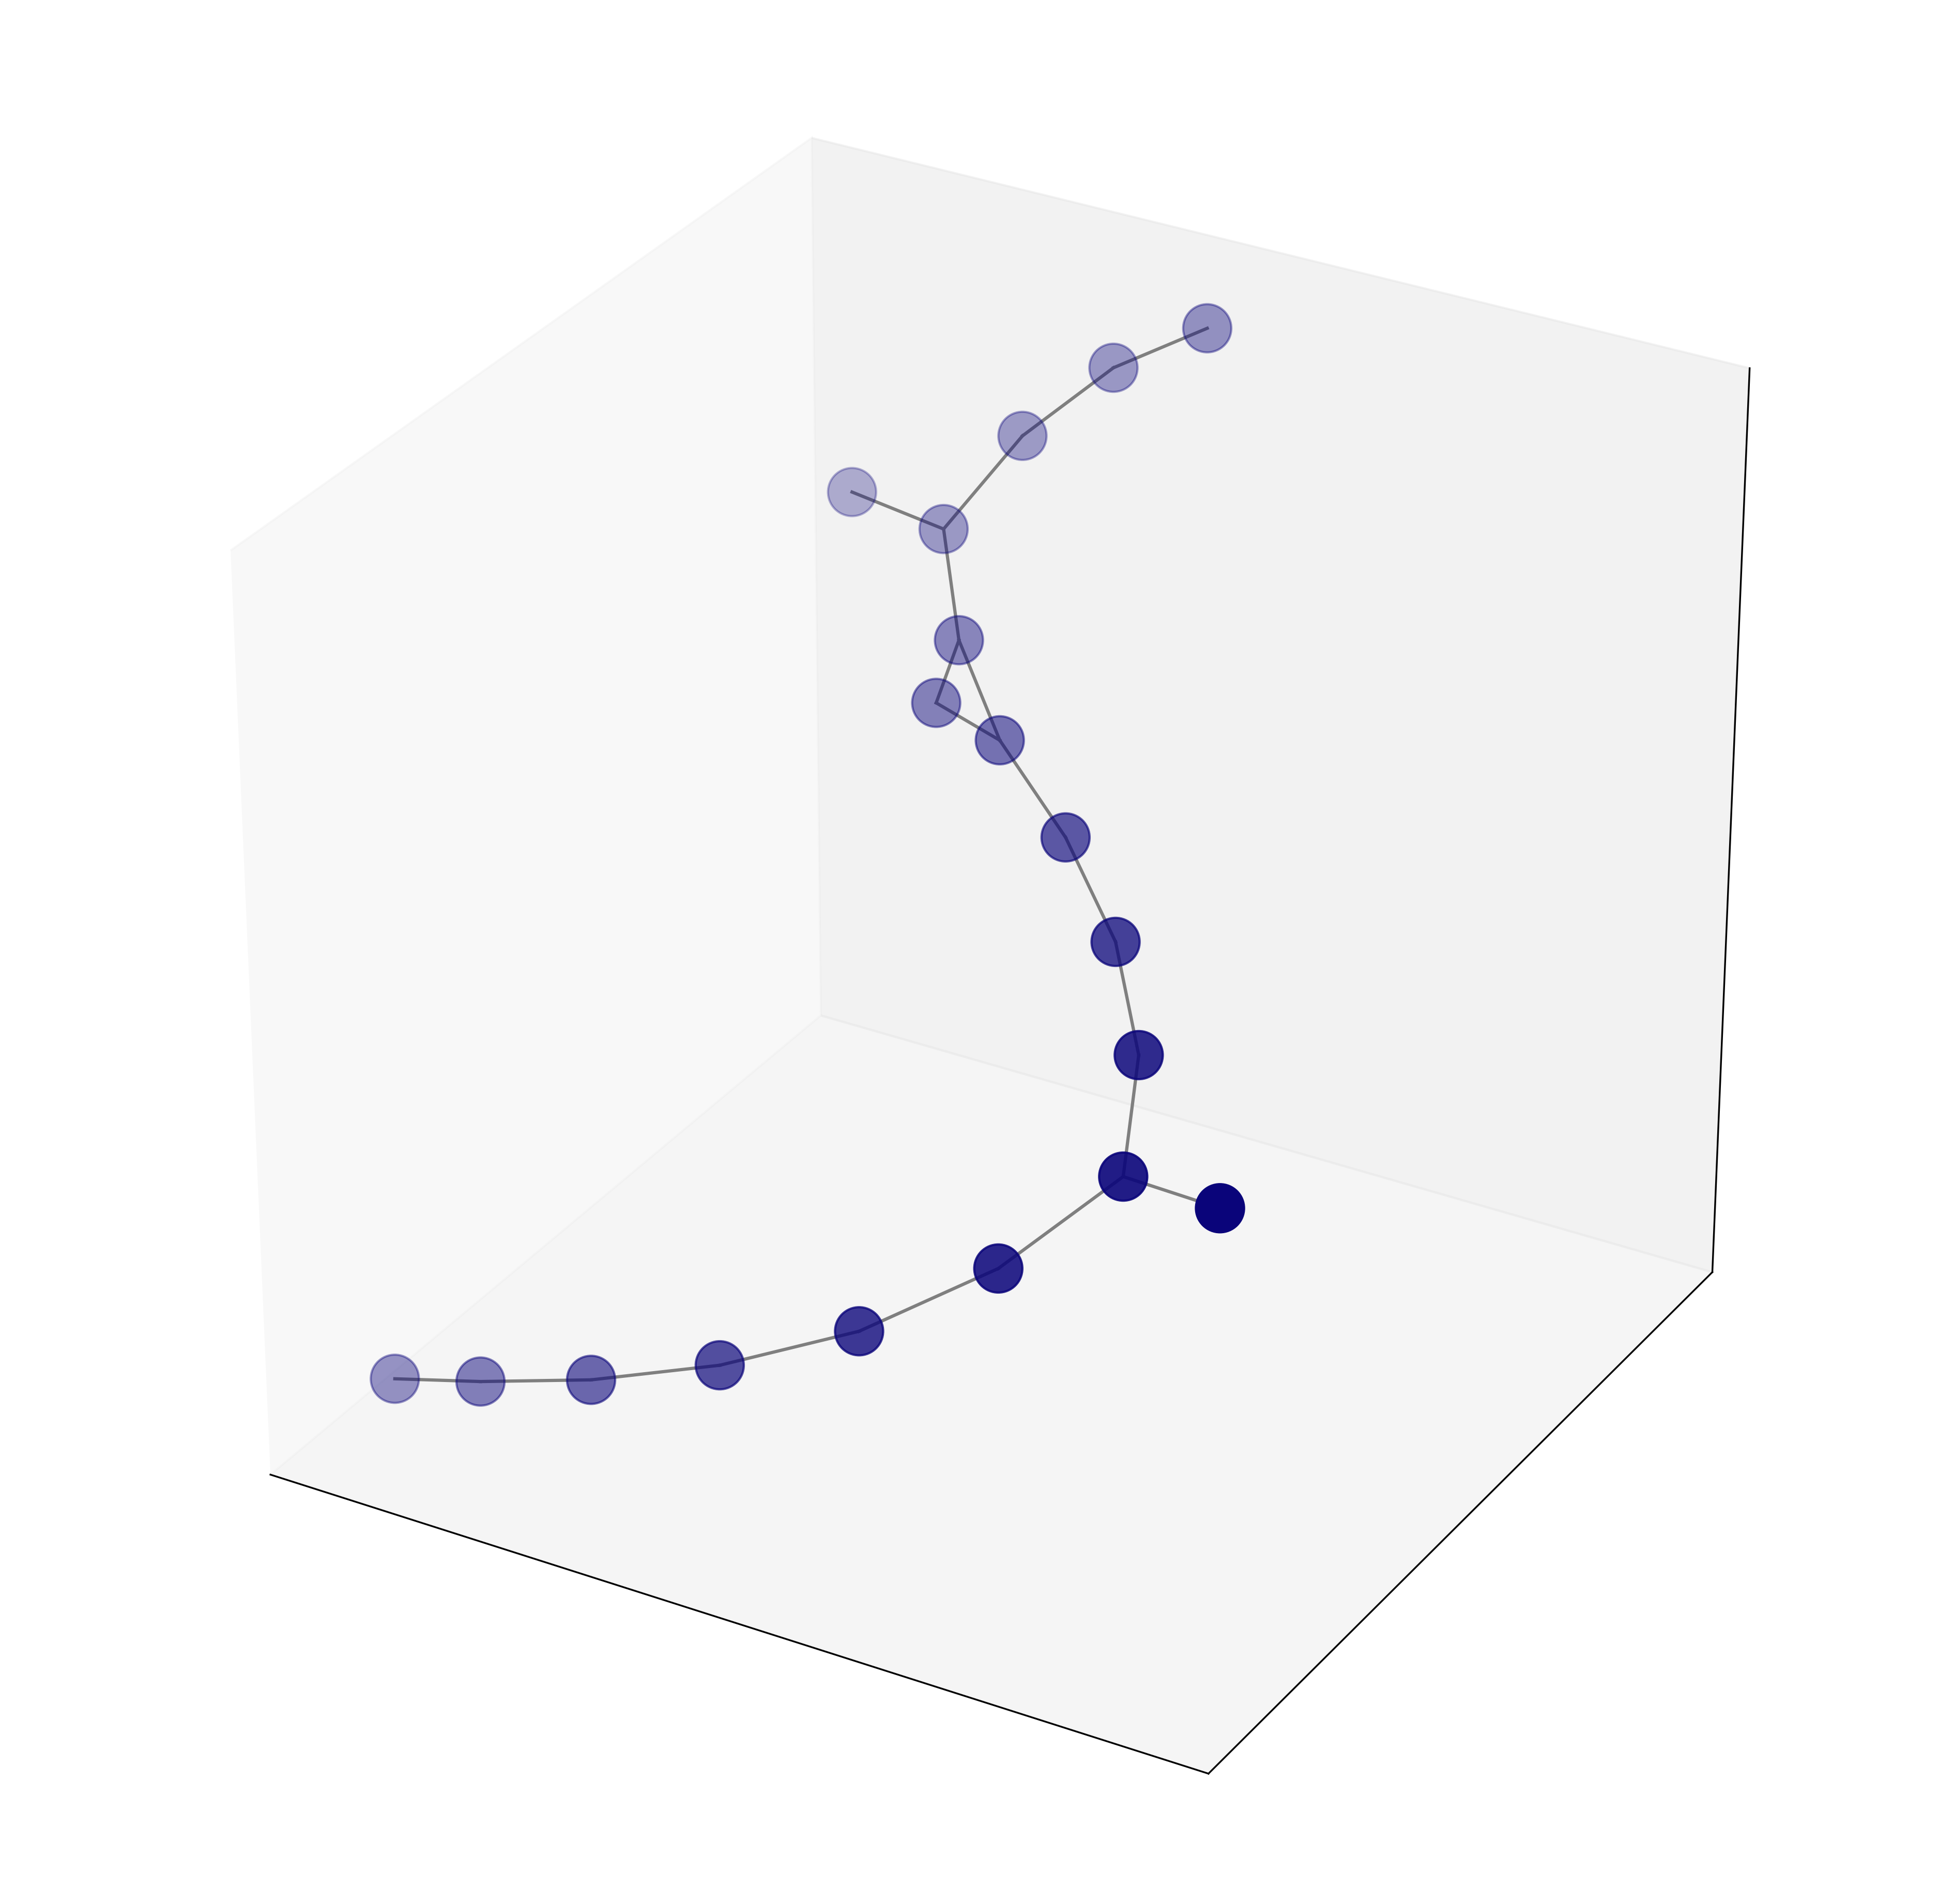

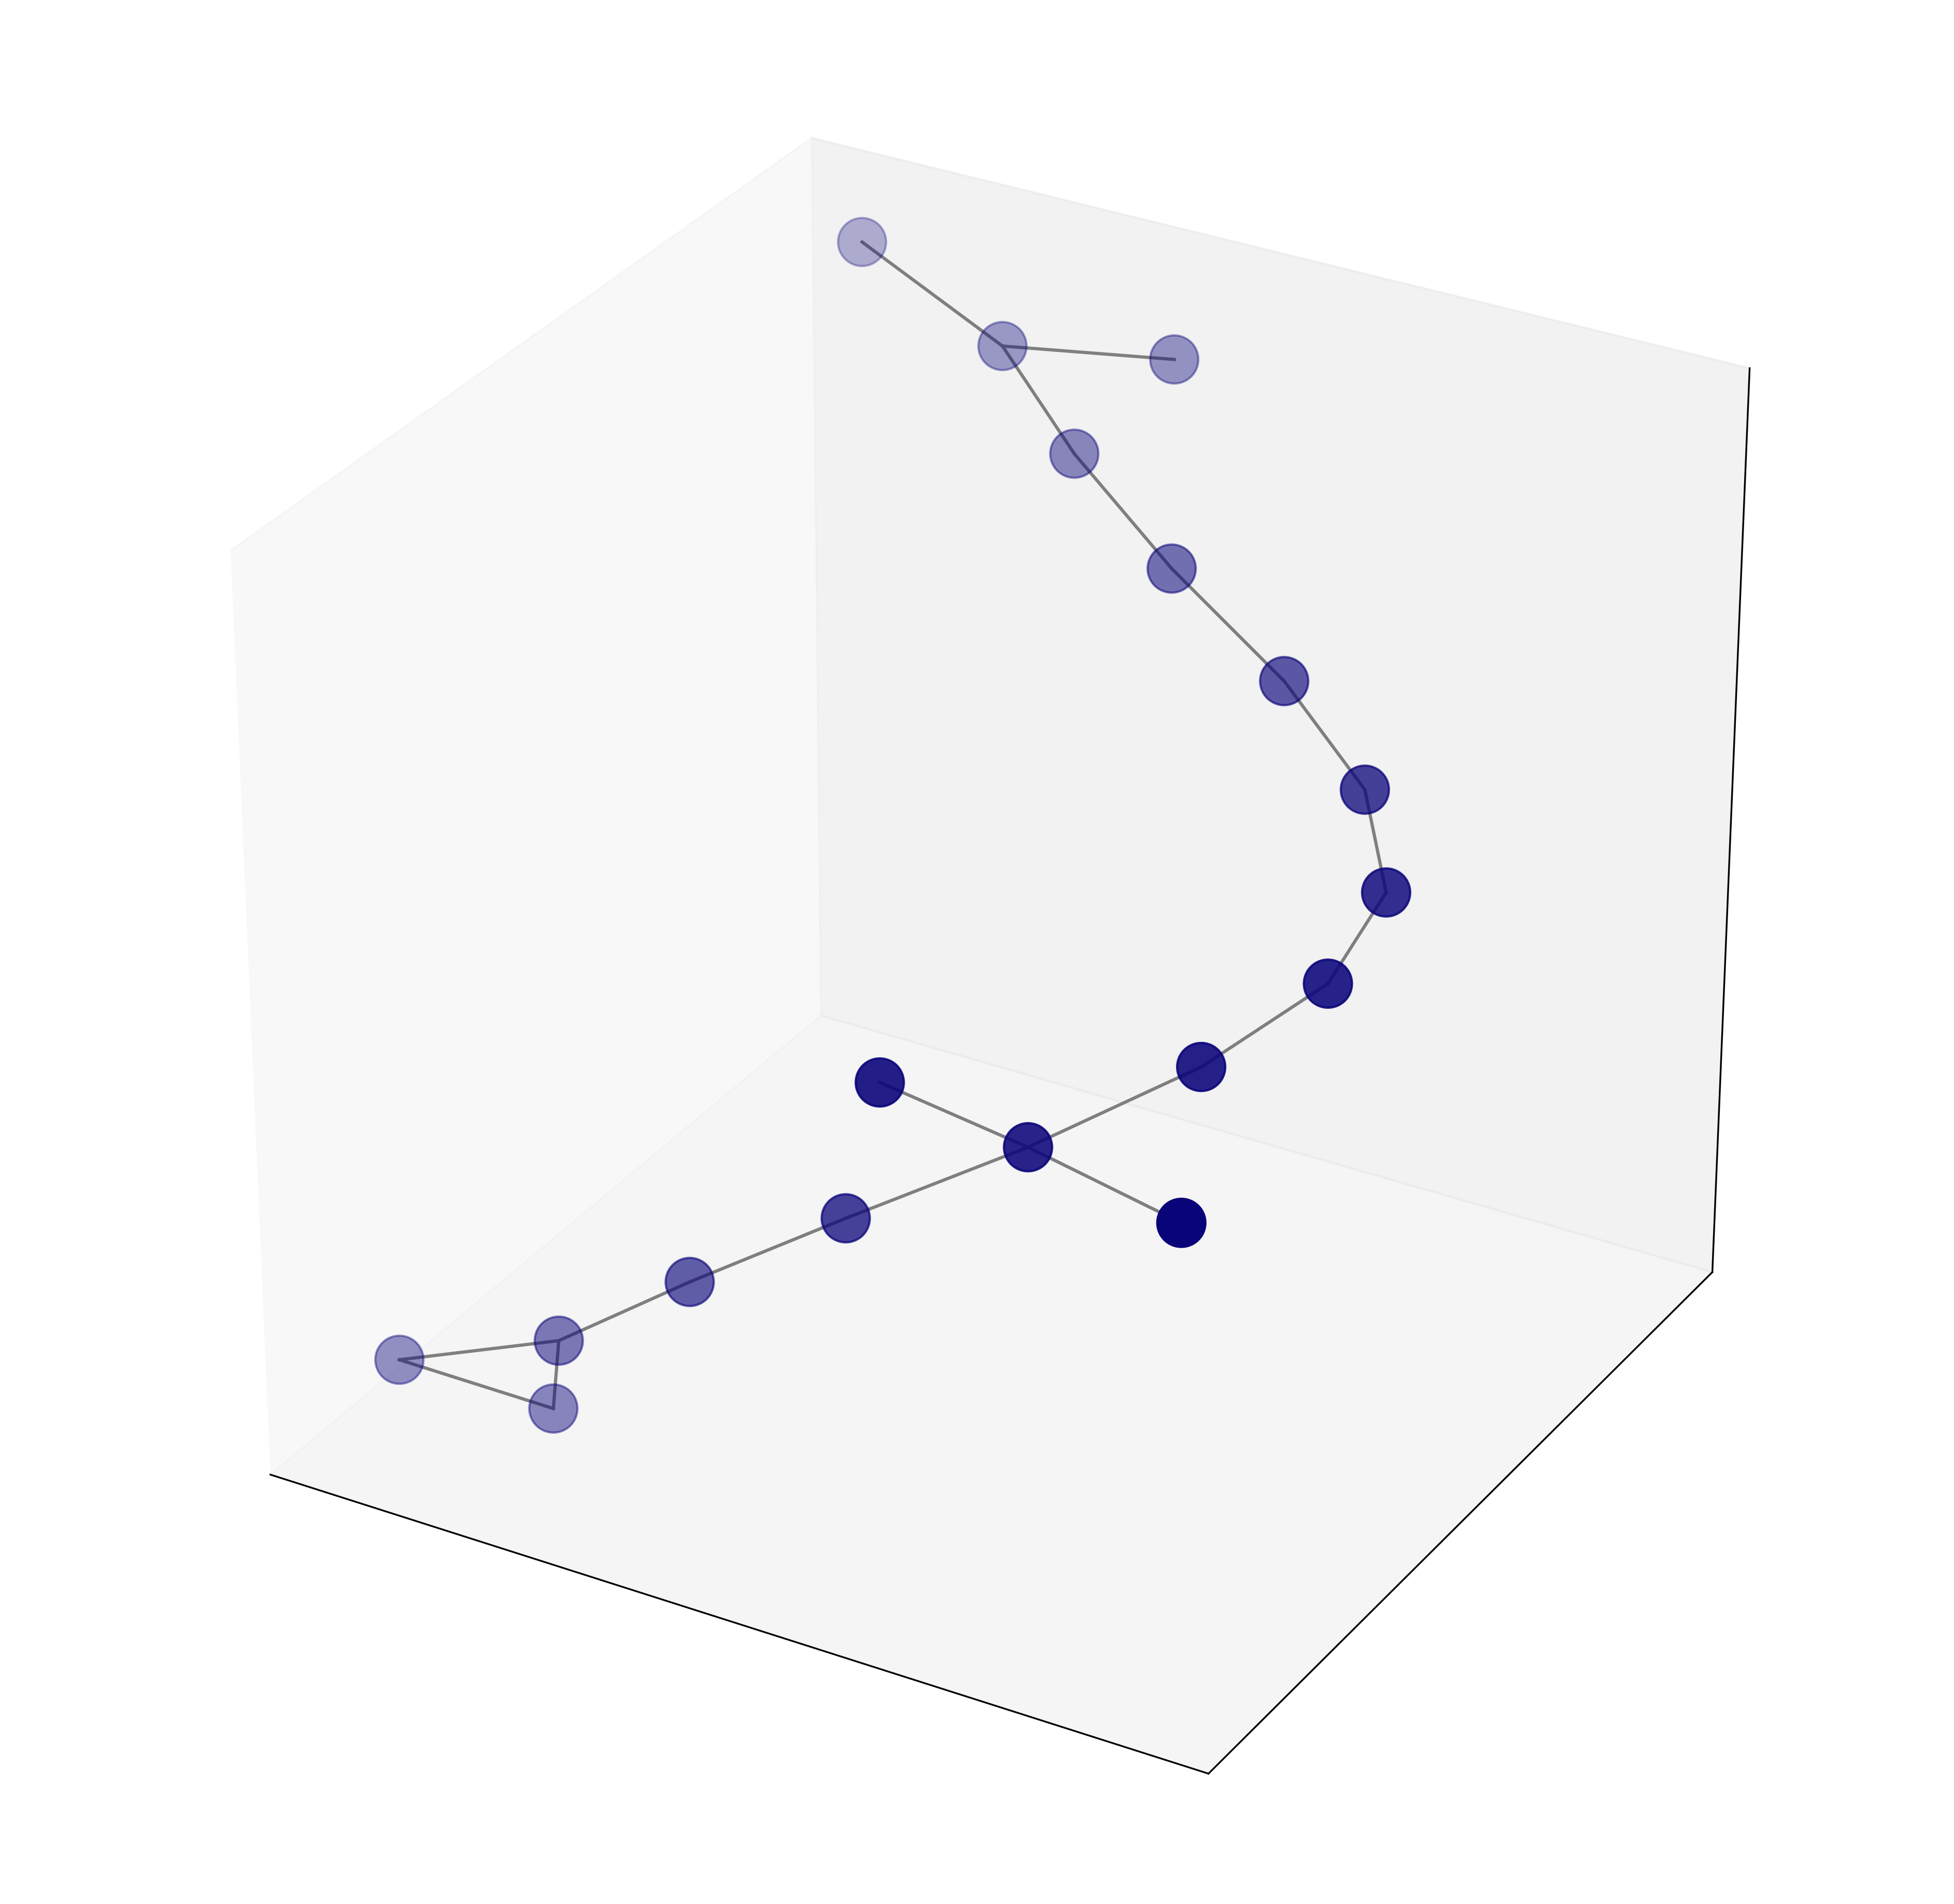

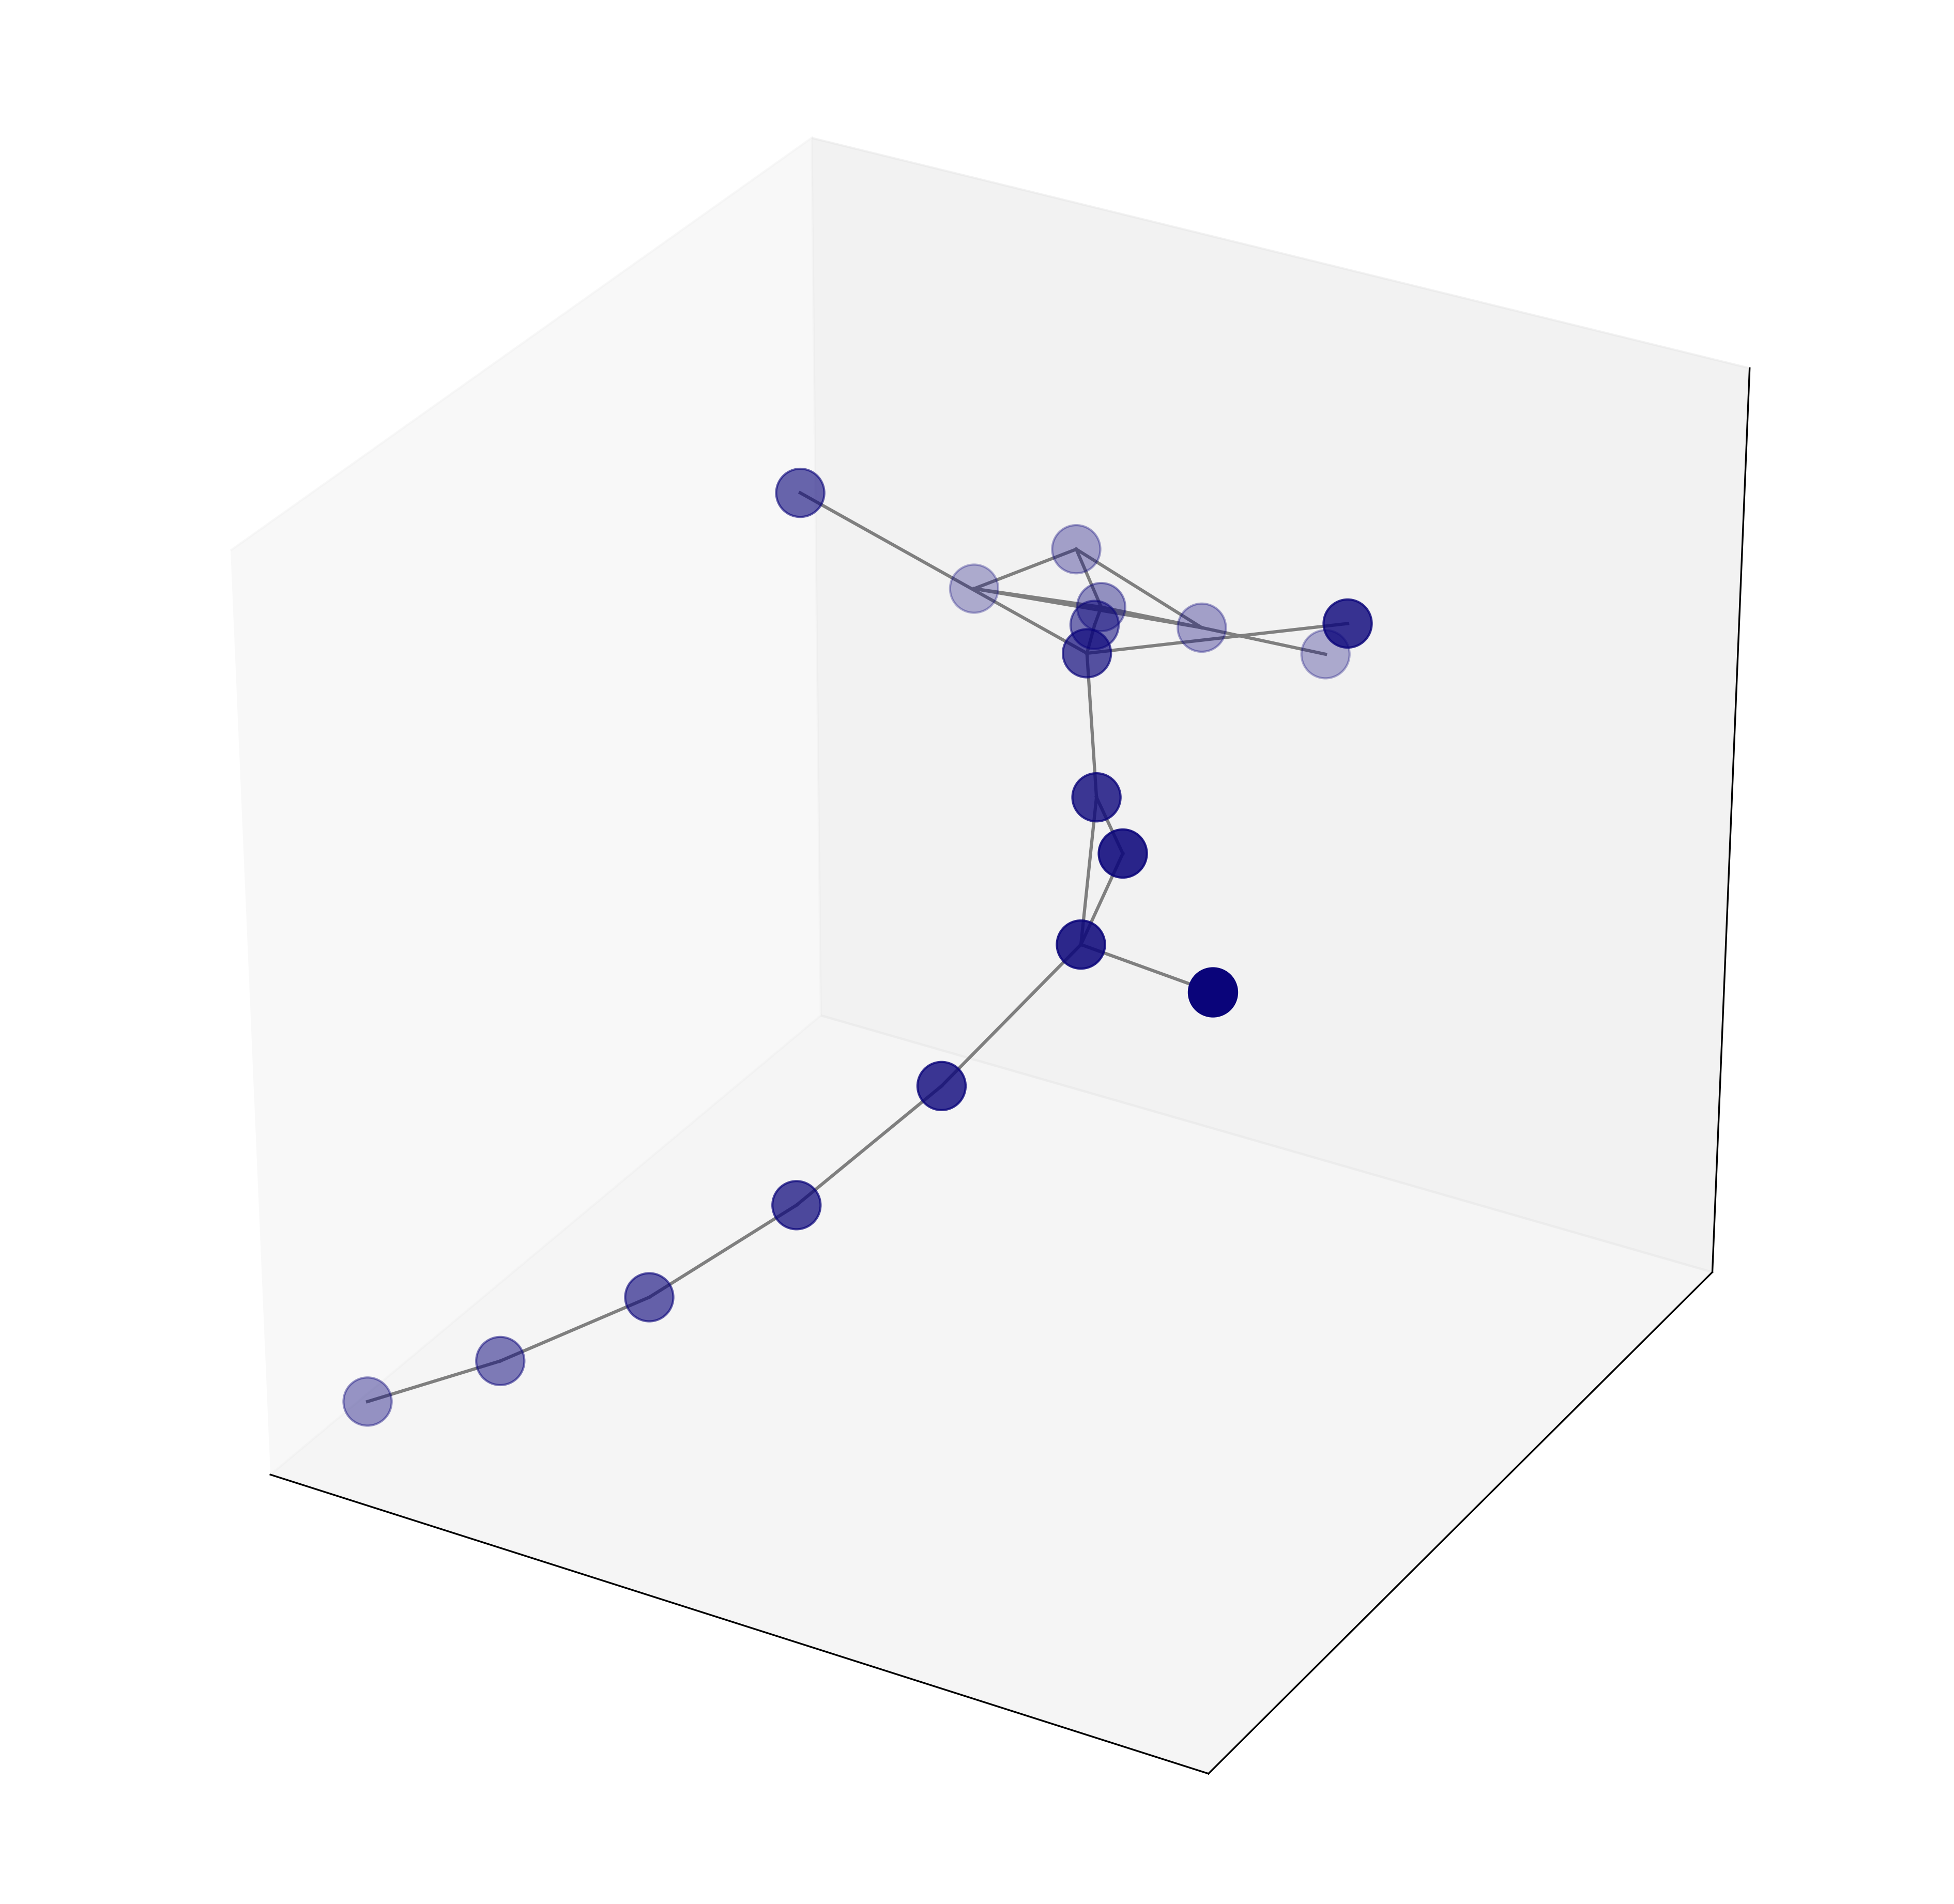

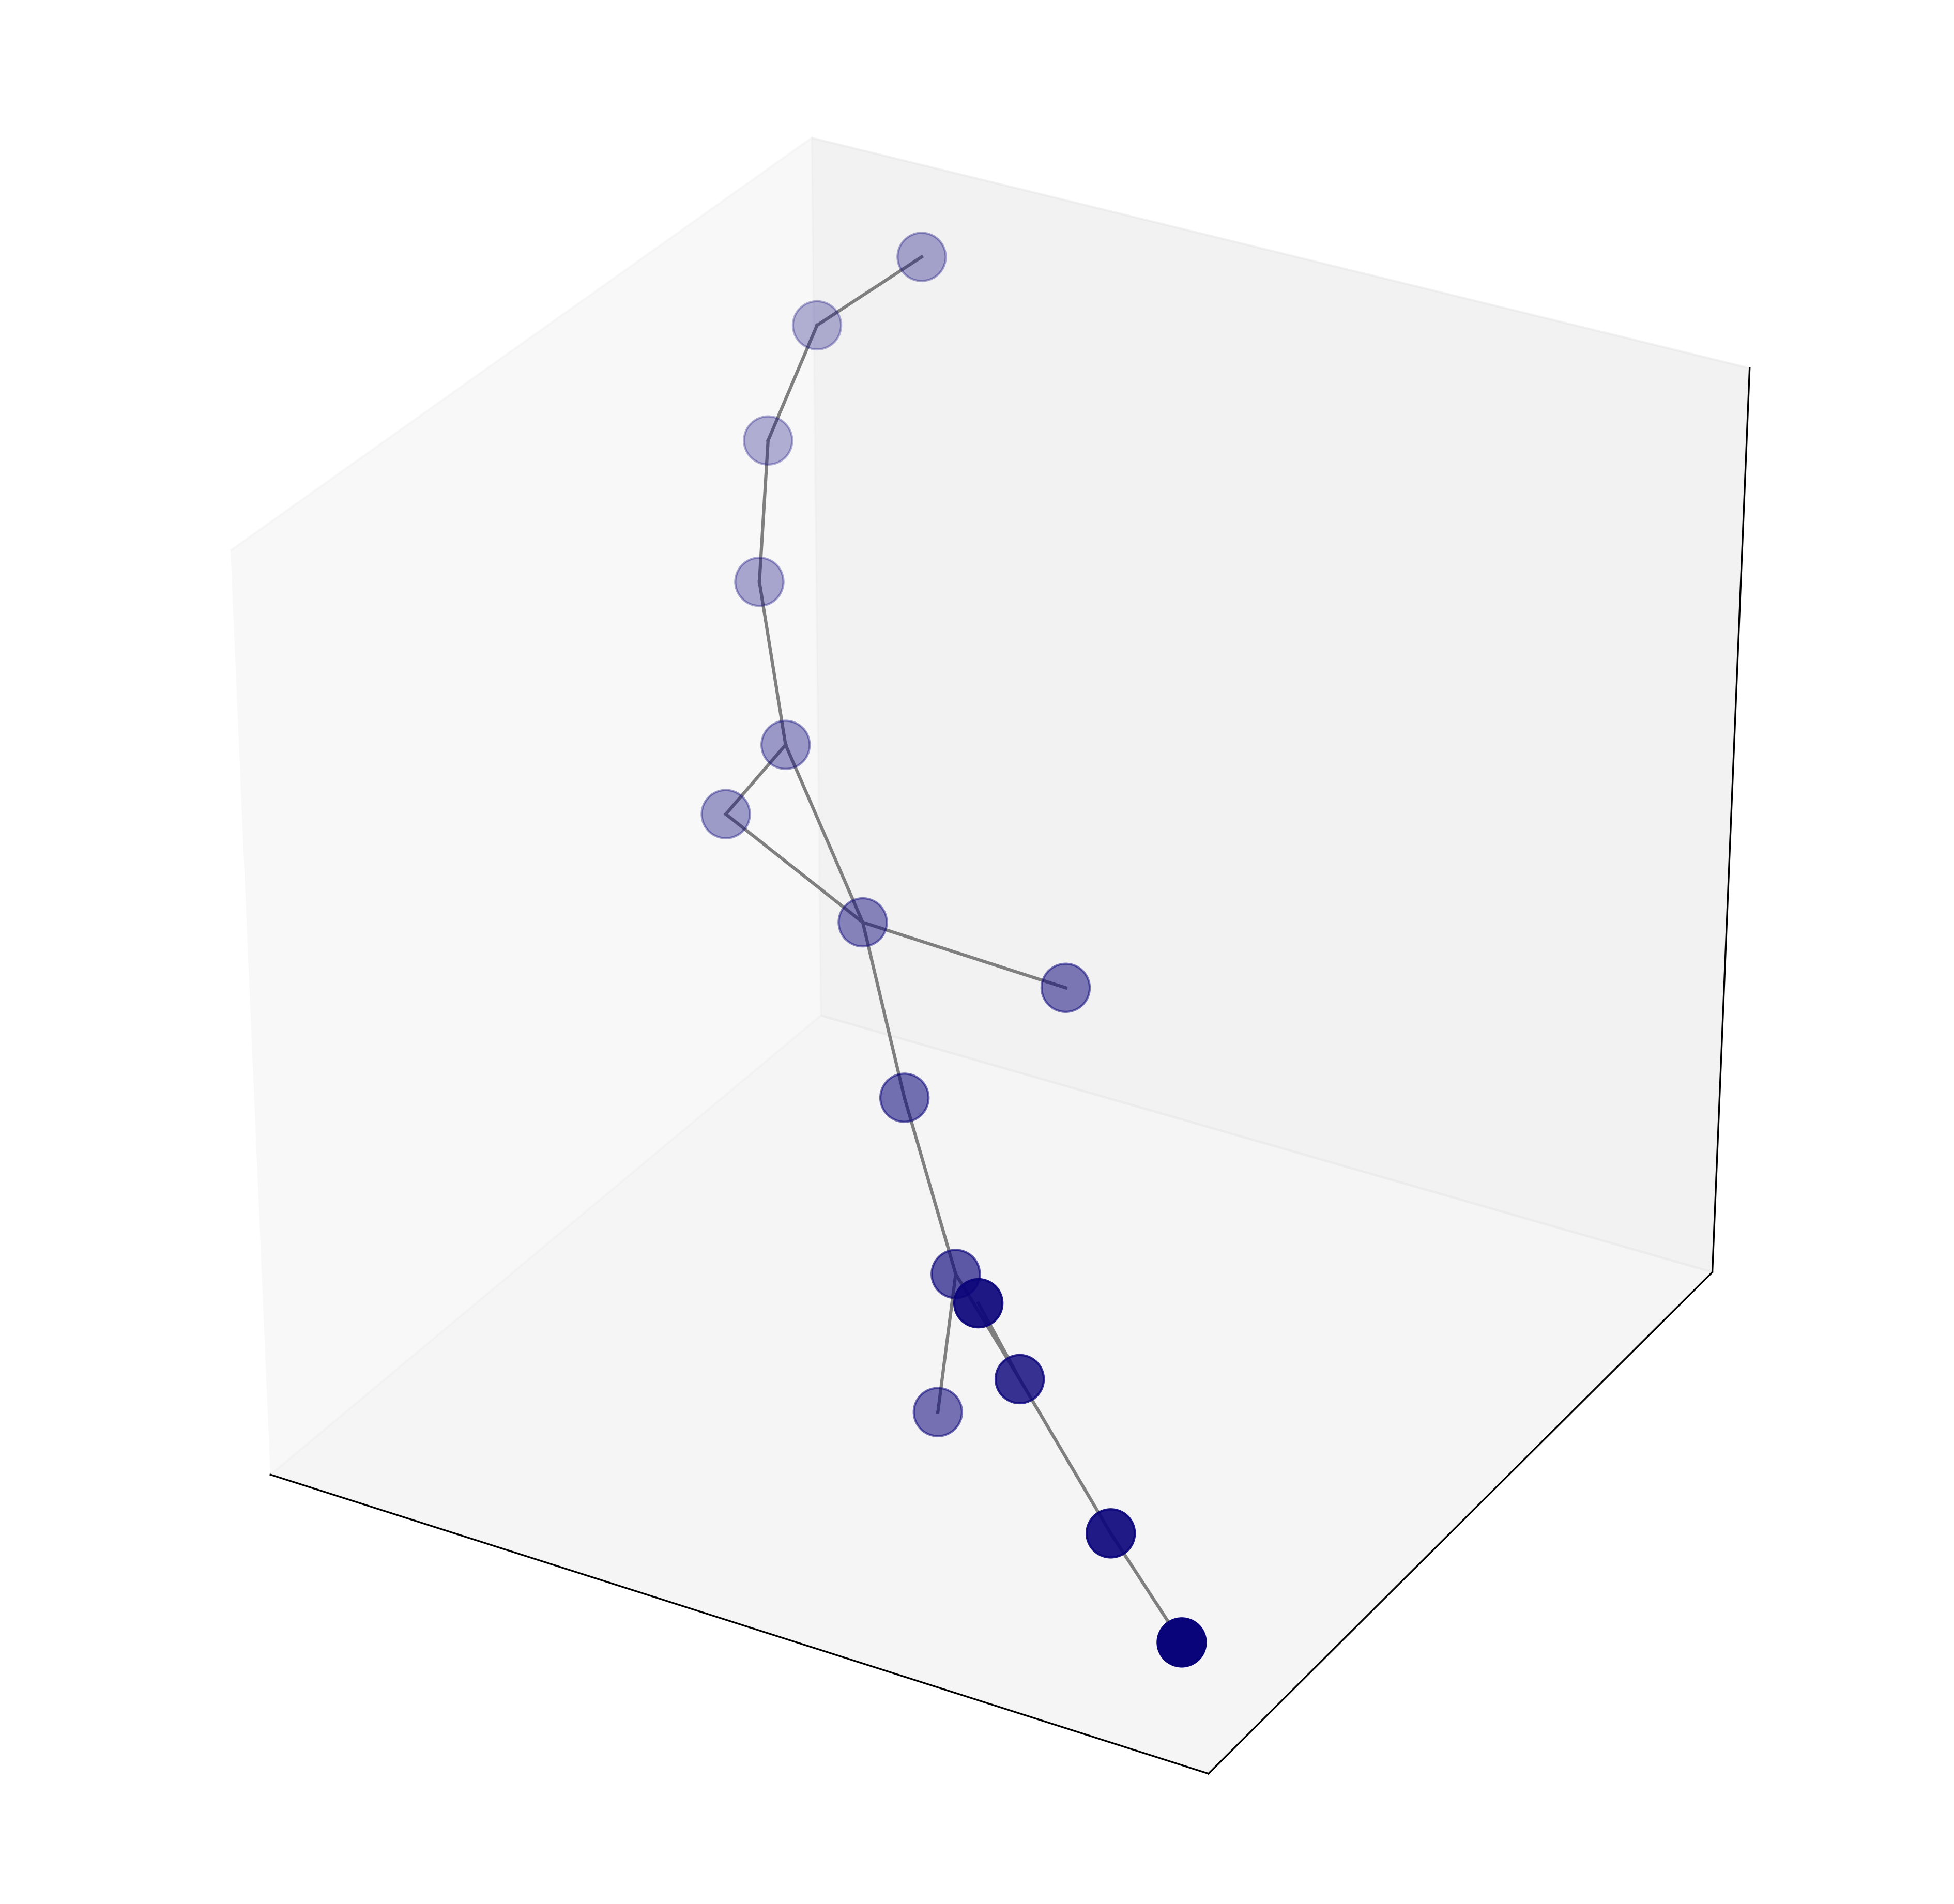

In [162]:
graph_visuals(dataset[0])
graph_visuals(dataset[10000])
graph_visuals(dataset[70023])
graph_visuals(dataset[len(dataset) - 1])
graph_visuals(dataset[20000])

In [163]:
#embeddings testing
import torch
import torch.nn.functional as F
from torch.nn import Sequential, Linear, BatchNorm1d, Mish
from torch_geometric.nn import GINConv, global_add_pool

class GIN(torch.nn.Module):
    """GIN"""
    def __init__(self, dim_h):
        super(GIN, self).__init__()
        self.conv1 = GINConv(
            Sequential(Linear(dataset.num_node_features, dim_h),
                       BatchNorm1d(dim_h), Mish(),
                       Linear(dim_h, dim_h), Mish()))
        self.conv2 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), Mish(),
                       Linear(dim_h, dim_h), Mish()))
        self.conv3 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), Mish(),
                       Linear(dim_h, dim_h), Mish()))
        self.lin1 = Linear(dim_h*3, dim_h*3)
        self.lin2 = Linear(dim_h*3, dataset.num_classes)

    def forward(self, x, edge_index, batch):
        # Node embeddings
        h1 = self.conv1(x, edge_index)
        h2 = self.conv2(h1, edge_index)
        h3 = self.conv3(h2, edge_index)

        # Graph-level readout
        h1 = global_add_pool(h1, batch)
        h2 = global_add_pool(h2, batch)
        h3 = global_add_pool(h3, batch)

        # Concatenate graph embeddings
        h = torch.cat((h1, h2, h3), dim=1)

        # Classifier
        h = self.lin1(h)
        h = F.dropout(h, p=0.5, training=self.training)
        h = self.lin2(h)

        return h, F.log_softmax(h, dim=1)


gin_original = GIN(dim_h=32)


In [164]:
# training for embedding
gin_original

GIN(
  (conv1): GINConv(nn=Sequential(
    (0): Linear(in_features=1, out_features=32, bias=True)
    (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Mish()
    (3): Linear(in_features=32, out_features=32, bias=True)
    (4): Mish()
  ))
  (conv2): GINConv(nn=Sequential(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Mish()
    (3): Linear(in_features=32, out_features=32, bias=True)
    (4): Mish()
  ))
  (conv3): GINConv(nn=Sequential(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Mish()
    (3): Linear(in_features=32, out_features=32, bias=True)
    (4): Mish()
  ))
  (lin1): Linear(in_features=96, out_features=96, bias=True)
  (lin2): Linear(in_features=96, out_features=4, bias=True)
)

In [165]:
gin_original.state_dict()

OrderedDict([('conv1.eps', tensor([0.])),
             ('conv1.nn.0.weight',
              tensor([[-0.7646],
                      [-0.2045],
                      [-0.0577],
                      [ 0.1284],
                      [ 0.2015],
                      [ 0.2518],
                      [ 0.1302],
                      [-0.5471],
                      [-0.9180],
                      [-0.0083],
                      [ 0.2368],
                      [ 0.6545],
                      [ 0.7854],
                      [ 0.6380],
                      [ 0.9505],
                      [ 0.7368],
                      [-0.7665],
                      [-0.6920],
                      [ 0.5246],
                      [-0.2065],
                      [ 0.4302],
                      [-0.2732],
                      [ 0.9051],
                      [ 0.8274],
                      [ 0.7814],
                      [ 0.8487],
                      [-0.2358],
                      [-0.3355],

In [166]:
from torch_geometric.loader import DataLoader
# Create training, validation, and test sets
print(dataset[10])
train_dataset = dataset[:int(len(dataset)*0.8)]
val_dataset   = dataset[int(len(dataset)*0.8):int(len(dataset)*0.9)]
test_dataset  = dataset[int(len(dataset)*0.9):]

print(f'Training set   = {len(train_dataset)} graphs')
print(f'Validation set = {len(val_dataset)} graphs')
print(f'Test set       = {len(test_dataset)} graphs')

# Create mini-batches
train_loader = DataLoader(train_dataset, batch_size = 64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print('\nTrain loader:')
for i, subgraph in enumerate(train_loader):
    print(f' - Subgraph {i}: {subgraph}')

print('\nValidation loader:')
for i, subgraph in enumerate(val_loader):
    print(f' - Subgraph {i}: {subgraph}')

print('\nTest loader:')
for i, subgraph in enumerate(test_loader):
    print(f' - Subgraph {i}: {subgraph}')

Data(x=[17, 1], edge_index=[2, 42], y=[1])
Training set   = 64000 graphs
Validation set = 8000 graphs
Test set       = 8000 graphs

Train loader:
 - Subgraph 0: DataBatch(x=[1098, 1], edge_index=[2, 2406], y=[64], batch=[1098], ptr=[65])
 - Subgraph 1: DataBatch(x=[1102, 1], edge_index=[2, 2448], y=[64], batch=[1102], ptr=[65])
 - Subgraph 2: DataBatch(x=[1076, 1], edge_index=[2, 2340], y=[64], batch=[1076], ptr=[65])
 - Subgraph 3: DataBatch(x=[1082, 1], edge_index=[2, 2364], y=[64], batch=[1082], ptr=[65])
 - Subgraph 4: DataBatch(x=[1093, 1], edge_index=[2, 2346], y=[64], batch=[1093], ptr=[65])
 - Subgraph 5: DataBatch(x=[1085, 1], edge_index=[2, 2338], y=[64], batch=[1085], ptr=[65])
 - Subgraph 6: DataBatch(x=[1073, 1], edge_index=[2, 2374], y=[64], batch=[1073], ptr=[65])
 - Subgraph 7: DataBatch(x=[1085, 1], edge_index=[2, 2442], y=[64], batch=[1085], ptr=[65])
 - Subgraph 8: DataBatch(x=[1084, 1], edge_index=[2, 2398], y=[64], batch=[1084], ptr=[65])
 - Subgraph 9: DataBatch(x

In [167]:
from tqdm.auto import tqdm


def train(model, loader):
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(),
                                      lr=0.01,
                                      weight_decay=0.01)
    epochs = 5

    model.train()
    for epoch in tqdm(range(epochs)):
        print(f"Epoch: {epoch}\n-------")
        #print(epoch)
        total_loss = 0
        acc = 0
        val_loss = 0
        val_acc = 0
        counter = 0
        # Train on batches
        for data in loader:
          optimizer.zero_grad()
          _, out = model(data.x, data.edge_index, data.batch)
          loss = criterion(out, data.y)
          total_loss += loss / len(loader)
          acc += accuracy(out.argmax(dim=1), data.y) / len(loader)
          loss.backward()
          optimizer.step()
          counter += 1
          if(counter % 100 == 0):
            print(f'Looked at {counter}/{len(loader)}')

          # Validation
          val_loss, val_acc = test(model, val_loader)

          # print per epoch to see if the accuracy goes up!
        print(f'Epoch {epoch:>0} | Train Loss: {total_loss:.2f} '
            f'| Train Acc: {acc*100:>5.2f}% '
            f'| Val Loss: {val_loss:.2f} '
            f'| Val Acc: {val_acc*100:.2f}%')


    test_loss, test_acc = test(model, test_loader)
    print(f'Test Loss: {test_loss:.2f} | Test Acc: {test_acc*100:.2f}%')

    return model

@torch.no_grad()
def test(model, loader):
    criterion = torch.nn.CrossEntropyLoss()
    model.eval()
    loss = 0
    acc = 0

    for data in loader:
        _, out = model(data.x, data.edge_index, data.batch)
        loss += criterion(out, data.y) / len(loader)
        acc += accuracy(out.argmax(dim=1), data.y) / len(loader)

    return loss, acc

def accuracy(pred_y, y):
    """Calculate accuracy."""
    return ((pred_y == y).sum() / len(y)).item()

#gcn = train(gcn, train_loader)
gin_original = train(gin_original, train_loader)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 100/1000
Looked at 200/1000
Looked at 300/1000
Looked at 400/1000
Looked at 500/1000
Looked at 600/1000
Looked at 700/1000
Looked at 800/1000
Looked at 900/1000
Looked at 1000/1000
Epoch 0 | Train Loss: 1.45 | Train Acc: 27.62% | Val Loss: 1.38 | Val Acc: 29.30%
Epoch: 1
-------
Looked at 100/1000
Looked at 200/1000
Looked at 300/1000
Looked at 400/1000
Looked at 500/1000
Looked at 600/1000
Looked at 700/1000
Looked at 800/1000
Looked at 900/1000
Looked at 1000/1000
Epoch 1 | Train Loss: 1.38 | Train Acc: 28.88% | Val Loss: 1.38 | Val Acc: 27.45%
Epoch: 2
-------
Looked at 100/1000
Looked at 200/1000
Looked at 300/1000
Looked at 400/1000
Looked at 500/1000
Looked at 600/1000
Looked at 700/1000
Looked at 800/1000
Looked at 900/1000
Looked at 1000/1000
Epoch 2 | Train Loss: 1.38 | Train Acc: 28.31% | Val Loss: 1.37 | Val Acc: 29.39%
Epoch: 3
-------
Looked at 100/1000
Looked at 200/1000
Looked at 300/1000
Looked at 400/1000
Looked at 500/1000
Looked at 600/1000

In [217]:
#let the placeholder have the original dataset
original = dataset # do not touch this

In [285]:
print(len(original))
print(len(dataset))

80000
211


In [286]:
dataset = original
print(len(dataset))

80000


In [287]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch
import scipy.sparse as sp
from torch_geometric.utils import from_scipy_sparse_matrix
from torch_geometric.data import Data

# Assuming GIN and dataset are defined elsewhere
checking = set()

# Assuming embeddings_out and embeddings_out_reference are numpy arrays
torch.manual_seed(42)
np.random.seed(42)

model = gin_original  # Replace with your model initialization
model.eval()

threshold_val = 0.5

# Initialize lists and set to store embeddings
embeddings_list = []
labels_list = []
distance_list = []
dis_label_list = []
selected = []
graph_removed = []
unique_reference_embeddings = set()  # Set to store unique reference embeddings

for data in dataset:
    new_x = data.x
    new_y = data.y

    # Create a reference graph with edges between consecutive nodes
    reference_graph = np.zeros((len(data.x), len(data.x)))

    for i in range(reference_graph.shape[0] - 1):
        reference_graph[i][i + 1] = 1
        reference_graph[i + 1][i] = 1

    reference_adj = sp.coo_matrix(reference_graph)
    edge_index, edge_attr = from_scipy_sparse_matrix(reference_adj)
    data_reference = Data(x=new_x, edge_index=edge_index, y=new_y)

    with torch.no_grad():
        # Get embeddings from the model
        embedding_out, _ = model(data.x, data.edge_index, data.batch)
        checking.add(torch.max(data.x).item())
        embedding_out_reference, _ = model(data_reference.x, data_reference.edge_index, data.batch)

    # Convert embeddings to numpy arrays and detach from gradient computation
    out_tensor = embedding_out.detach().numpy()
    reference_out_tensor = embedding_out_reference.detach().numpy()

    # Append embeddings and labels to lists
    embeddings_list.append(out_tensor)
    embeddings_list.append(reference_out_tensor)
    labels_list.append(data.y.numpy())
    labels_list.append(data_reference.y.numpy())

    # Calculate Euclidean distance and select based on threshold
    e_dis = np.linalg.norm(out_tensor - reference_out_tensor)
    #print(e_dis)
    if e_dis >= threshold_val:
        selected.append(data)
        sampling = np.array(out_tensor)
        distance_list.append(sampling)
        dis_label_list.append(data.y.numpy())
    else:
        graph_removed.append(data)

    # Collect unique embeddings from embedding_out_reference
    for emb in reference_out_tensor:
        unique_reference_embeddings.add(tuple(emb))

# Convert lists to numpy arrays for plotting
measure = np.array(distance_list)
embeddings = np.array(embeddings_list)
labels = np.hstack(labels_list)
dis_labels = np.hstack(dis_label_list)

# Convert set of unique reference embeddings back to numpy array
unique_reference_embeddings = np.array(list(unique_reference_embeddings))

# Now unique_reference_embeddings contains all unique embeddings from embedding_out_reference



In [288]:
print(len(selected))
print(len(dataset))

35
80000


In [289]:
print(checking)
print(len(checking))
print(len(graph_removed))

{3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0}
18
79965


In [290]:
print(len(unique_reference_embeddings))
print(unique_reference_embeddings)

18
[[ 0.10154623  0.24119931 -0.34536755  0.00512233]
 [ 0.14849153  0.30933285 -0.5012034   0.04370501]
 [-0.0044355   0.09044558 -0.01328844 -0.0666227 ]
 [ 0.15302506  0.31642658 -0.51958823  0.05003352]
 [ 0.06406622  0.18774171 -0.22701564 -0.02095701]
 [ 0.0197597   0.12478182 -0.08859707 -0.0506322 ]
 [ 0.12623465  0.28383192 -0.47154272  0.0599369 ]
 [-0.02975     0.05453558  0.06541938 -0.08328959]
 [ 0.13033752  0.28261462 -0.43853962  0.02691241]
 [ 0.14086159  0.29797065 -0.4740048   0.03597505]
 [ 0.04265843  0.15730238 -0.16001803 -0.03538571]
 [ 0.08377133  0.21581087 -0.28900728 -0.00742593]
 [ 0.11715065  0.2635795  -0.39543718  0.01659865]
 [ 0.15224053  0.3170483  -0.528421    0.05831546]
 [ 0.14681269  0.3104313  -0.5185996   0.06025366]
 [ 0.13809189  0.29928684 -0.49948913  0.06076849]
 [ 0.11147743  0.26439267 -0.435435    0.05786721]
 [ 0.15430585  0.31904015 -0.5287414   0.05491142]]


In [291]:
dataset = selected

In [292]:
dataset = MyCustomDataset(dataset).shuffle()

Processing...
Done!


In [293]:
#embeddings testing
import torch
import torch.nn.functional as F
from torch.nn import Sequential, Linear, BatchNorm1d, Mish
from torch_geometric.nn import GINConv, global_add_pool

class GIN(torch.nn.Module):
    """GIN"""
    def __init__(self, dim_h):
        super(GIN, self).__init__()
        self.conv1 = GINConv(
            Sequential(Linear(dataset.num_node_features, dim_h),
                       BatchNorm1d(dim_h), Mish(),
                       Linear(dim_h, dim_h), Mish()))
        self.conv2 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), Mish(),
                       Linear(dim_h, dim_h), Mish()))
        self.conv3 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), Mish(),
                       Linear(dim_h, dim_h), Mish()))
        self.lin1 = Linear(dim_h*3, dim_h*3)
        self.lin2 = Linear(dim_h*3, dataset.num_classes)

    def forward(self, x, edge_index, batch):
        # Node embeddings
        h1 = self.conv1(x, edge_index)
        h2 = self.conv2(h1, edge_index)
        h3 = self.conv3(h2, edge_index)

        # Graph-level readout
        h1 = global_add_pool(h1, batch)
        h2 = global_add_pool(h2, batch)
        h3 = global_add_pool(h3, batch)

        # Concatenate graph embeddings
        h = torch.cat((h1, h2, h3), dim=1)

        # Classifier
        h = self.lin1(h)
        h = F.dropout(h, p=0.5, training=self.training)
        h = self.lin2(h)

        return h, F.log_softmax(h, dim=1)



gin_2 = GIN(dim_h=32)


In [294]:
print(len(selected))
print(len(dataset))

35
35


In [295]:
from torch_geometric.loader import DataLoader
# Create training, validation, and test sets
print(dataset[10])
train_dataset = dataset[:int(len(dataset)*0.8)]
val_dataset   = dataset[int(len(dataset)*0.8):int(len(dataset)*0.9)]
test_dataset  = dataset[int(len(dataset)*0.9):]

print(f'Training set   = {len(train_dataset)} graphs')
print(f'Validation set = {len(val_dataset)} graphs')
print(f'Test set       = {len(test_dataset)} graphs')

# Create mini-batches
train_loader = DataLoader(train_dataset, batch_size = 64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print('\nTrain loader:')
for i, subgraph in enumerate(train_loader):
    print(f' - Subgraph {i}: {subgraph}')

print('\nValidation loader:')
for i, subgraph in enumerate(val_loader):
    print(f' - Subgraph {i}: {subgraph}')

print('\nTest loader:')
for i, subgraph in enumerate(test_loader):
    print(f' - Subgraph {i}: {subgraph}')

Data(x=[18, 1], edge_index=[2, 62], y=[1])
Training set   = 28 graphs
Validation set = 3 graphs
Test set       = 4 graphs

Train loader:
 - Subgraph 0: DataBatch(x=[545, 1], edge_index=[2, 1752], y=[28], batch=[545], ptr=[29])

Validation loader:
 - Subgraph 0: DataBatch(x=[59, 1], edge_index=[2, 196], y=[3], batch=[59], ptr=[4])

Test loader:
 - Subgraph 0: DataBatch(x=[79, 1], edge_index=[2, 270], y=[4], batch=[79], ptr=[5])


In [296]:
from tqdm.auto import tqdm


def train(model, loader):
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(),
                                      lr=0.01,
                                      weight_decay=0.01)
    epochs = 5

    model.train()
    for epoch in tqdm(range(epochs)):
        print(f"Epoch: {epoch}\n-------")
        #print(epoch)
        total_loss = 0
        acc = 0
        val_loss = 0
        val_acc = 0
        counter = 0
        # Train on batches
        for data in loader:
          optimizer.zero_grad()
          _, out = model(data.x, data.edge_index, data.batch)
          loss = criterion(out, data.y)
          total_loss += loss / len(loader)
          acc += accuracy(out.argmax(dim=1), data.y) / len(loader)
          loss.backward()
          optimizer.step()
          counter += 1
          if(counter % 100 == 0):
            print(f'Looked at {counter}/{len(loader)}')

          # Validation
          val_loss, val_acc = test(model, val_loader)

          # print per epoch to see if the accuracy goes up!
        print(f'Epoch {epoch:>0} | Train Loss: {total_loss:.2f} '
            f'| Train Acc: {acc*100:>5.2f}% '
            f'| Val Loss: {val_loss:.2f} '
            f'| Val Acc: {val_acc*100:.2f}%')


    test_loss, test_acc = test(model, test_loader)
    print(f'Test Loss: {test_loss:.2f} | Test Acc: {test_acc*100:.2f}%')

    return model

@torch.no_grad()
def test(model, loader):
    criterion = torch.nn.CrossEntropyLoss()
    model.eval()
    loss = 0
    acc = 0

    for data in loader:
        _, out = model(data.x, data.edge_index, data.batch)
        loss += criterion(out, data.y) / len(loader)
        acc += accuracy(out.argmax(dim=1), data.y) / len(loader)

    return loss, acc

def accuracy(pred_y, y):
    """Calculate accuracy."""
    return ((pred_y == y).sum() / len(y)).item()

#gcn = train(gcn, train_loader)
gin_2 = train(gin_2, train_loader)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------
Epoch 0 | Train Loss: 0.86 | Train Acc: 57.14% | Val Loss: 0.00 | Val Acc: 100.00%
Epoch: 1
-------
Epoch 1 | Train Loss: 10.63 | Train Acc: 78.57% | Val Loss: 27.66 | Val Acc: 0.00%
Epoch: 2
-------
Epoch 2 | Train Loss: 23.32 | Train Acc: 14.29% | Val Loss: 0.00 | Val Acc: 100.00%
Epoch: 3
-------
Epoch 3 | Train Loss: 4.80 | Train Acc: 78.57% | Val Loss: 0.00 | Val Acc: 100.00%
Epoch: 4
-------
Epoch 4 | Train Loss: 3.96 | Train Acc: 78.57% | Val Loss: 0.62 | Val Acc: 66.67%
Test Loss: 0.81 | Test Acc: 75.00%


In [344]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import plotly.express as px
import plotly.io as pio

# Ensure Plotly is configured for interactive display in the notebook
pio.renderers.default = 'notebook'  # or 'browser' if not in a notebook environment

# Function to sample data
def sample_data(df, sample_size):
    return df.sample(n=sample_size, random_state=42)

# Sample size
sample_size = 10  # Adjust this based on your memory constraints

# Combine all data into a single DataFrame with an indicator column
df_reference = pd.DataFrame({
    'Dim1': embeddings[1::2, :, 0].flatten(),
    'Dim2': embeddings[1::2, :, 1].flatten(),
    'Dim3': embeddings[1::2, :, 2].flatten(),
    'Dim4': embeddings[1::2, :, 3].flatten(),
    'Label': 'Reference'
})

# Measure data
df_measure = pd.DataFrame({
    'Dim1': measure[:, :, 0].flatten(),
    'Dim2': measure[:, :, 1].flatten(),
    'Dim3': measure[:, :, 2].flatten(),
    'Dim4': measure[:, :, 3].flatten(),
    'Label': dis_labels[:].repeat(embeddings.shape[1])
})

# Embeddings data
df_embeddings = pd.DataFrame({
    'Dim1': embeddings[::2, :, 0].flatten(),
    'Dim2': embeddings[::2, :, 1].flatten(),
    'Dim3': embeddings[::2, :, 2].flatten(),
    'Dim4': embeddings[::2, :, 3].flatten(),
    'Label': labels[::2].repeat(embeddings.shape[1])
})

# Extract unique embeddings from each DataFrame
unique_reference = df_reference[['Dim1', 'Dim2', 'Dim3', 'Dim4', 'Label']].drop_duplicates()
unique_measure = df_measure[['Dim1', 'Dim2', 'Dim3', 'Dim4', 'Label']].drop_duplicates()
unique_embeddings = sample_data(df_embeddings[['Dim1', 'Dim2', 'Dim3', 'Dim4', 'Label']].drop_duplicates(), sample_size)

# Combine unique embeddings
combined_df = pd.concat([unique_reference, unique_measure, unique_embeddings])

# Perform t-SNE to reduce to 2 dimensions
tsne_reducer = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
tsne_result = tsne_reducer.fit_transform(combined_df[['Dim1', 'Dim2', 'Dim3', 'Dim4']])

combined_df['TSNE1'] = tsne_result[:, 0]
combined_df['TSNE2'] = tsne_result[:, 1]

# Plot the combined unique embeddings
fig = px.scatter(
    combined_df,
    x='TSNE1',
    y='TSNE2',
    color='Label',
    title='2D t-SNE Visualization of Unique Embeddings',
    labels={'TSNE1': 't-SNE Dimension 1', 'TSNE2': 't-SNE Dimension 2'}
)

# Display the plot
pio.show(fig)


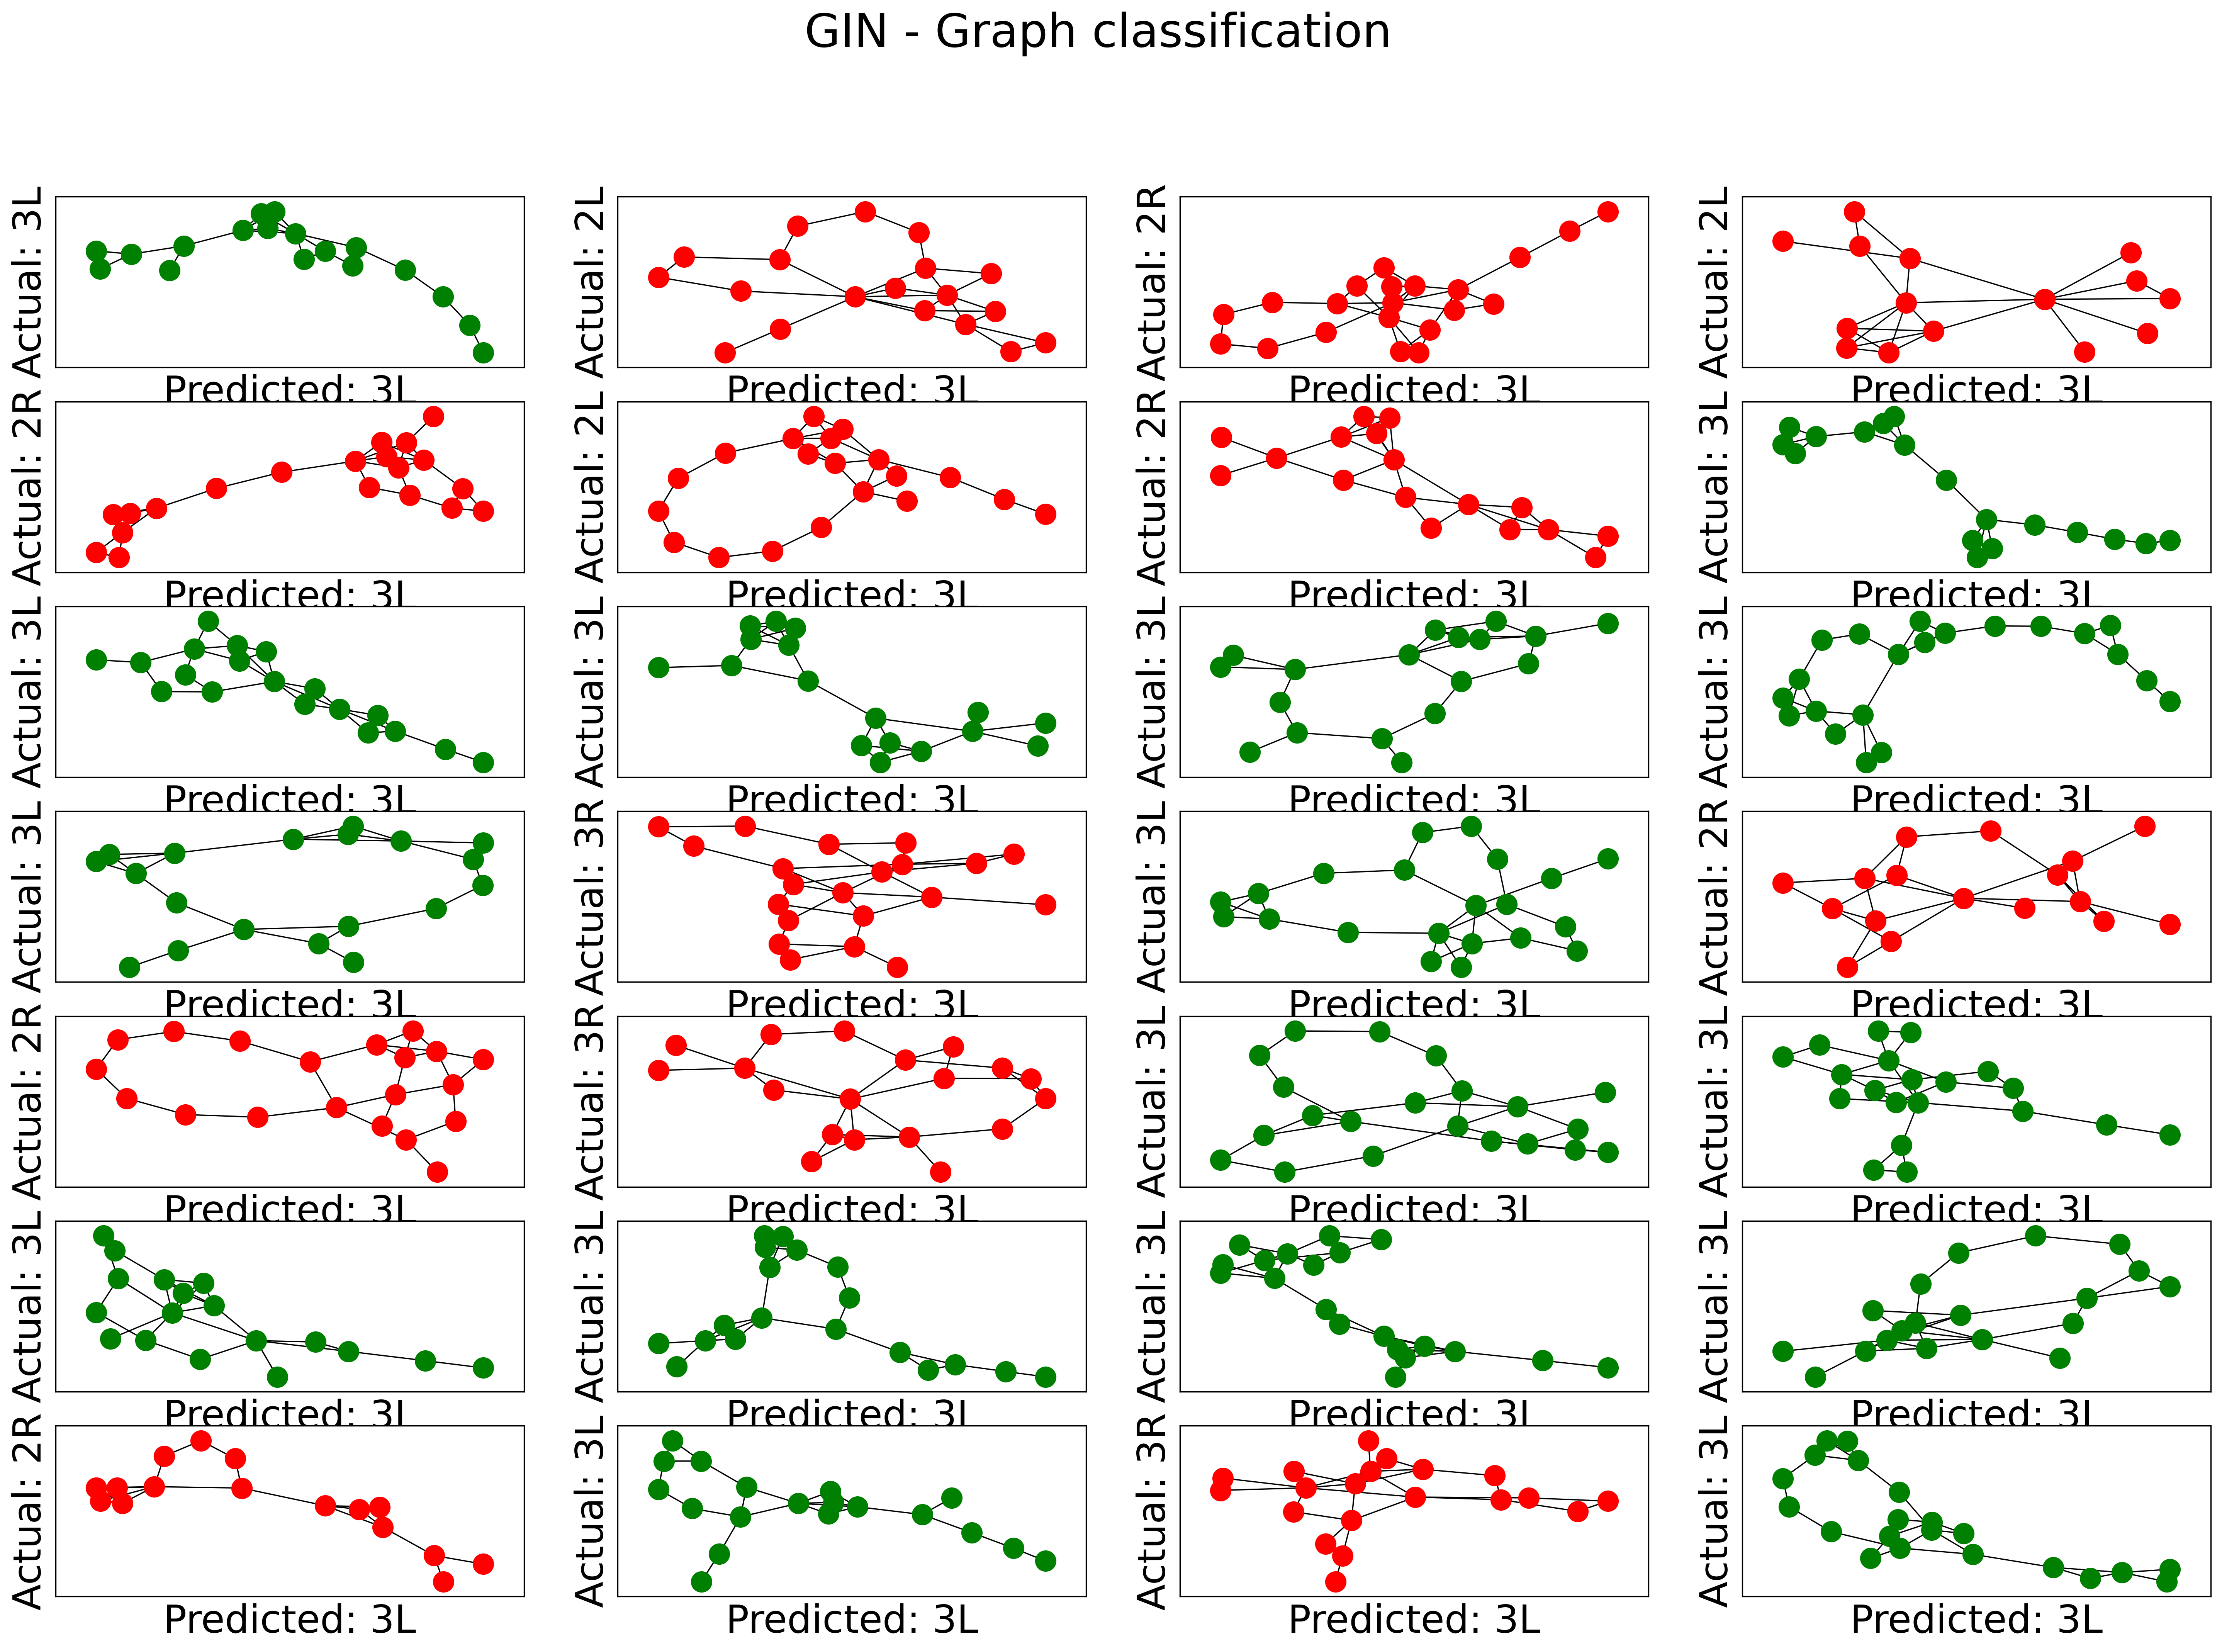

In [282]:
fig, ax = plt.subplots(7, 4, figsize=(24,16))
fig.suptitle('GIN - Graph classification')
lookup = {0: "2L", 1: "2R", 2: "3L", 3: "3R"}

for i, data in enumerate(dataset[len(dataset) - 28:len(dataset)]):
    # Calculate color (green if correct, red otherwise)
    _, out = gin_2(data.x, data.edge_index, data.batch)
    #color = "green" # set default color to green
    #if (out.argmax(dim = 1) != data.y):
    # 2L = 0; 2R = 1; 3L = 2, 3R = 3

    color = "green" if out.argmax(dim=1) == data.y else "red"

    # Plot graph
    ix = np.unravel_index(i, ax.shape)
    predicted = out.argmax(dim = 1).numpy()[0]
    actual = data.y.numpy()[0]
    ax[ix].axis('on')
    ax[ix].set_xlabel("Predicted: " + lookup[predicted])
    ax[ix].set_ylabel("Actual: " + lookup[actual])
    G = to_networkx(dataset[i], to_undirected=True)
    nx.draw_networkx(G,
                    pos=nx.spring_layout(G, seed=0),
                    with_labels=False,
                    node_size=150,
                    node_color=color,
                    width=0.8,
                    ax=ax[ix]
                    )

In [322]:
#gcn.eval()
gin_original.eval()
acc_gcn = 0
acc_gin = 0
acc = 0

for data in test_loader:
    # Get classifications
    #_, out_gcn = gcn(data.x, data.edge_index, data.batch)
    _, out_gin = gin_2(data.x, data.edge_index, data.batch)
    out = out_gin

    # Calculate accuracy scores
    #acc_gcn += accuracy(out_gcn.argmax(dim=1), data.y) / len(test_loader)
    acc_gin += accuracy(out_gin.argmax(dim=1), data.y) / len(test_loader)
    acc += accuracy(out.argmax(dim=1), data.y) / len(test_loader)

# Print results
#print(f'GCN accuracy:     {acc_gcn*100:.2f}%')
print(f'GIN accuracy:     {acc_gin*100:.2f}%')
#print(f'GCN+GIN accuracy: {acc*100:.2f}%')

#placeholder = np.array([threshold_val, acc_gin])
#print(placeholder)
#accuracy_collector.append(placeholder)

GIN accuracy:     75.00%


In [323]:
#Euclidean distance
(0, 0.2806), (0.1, 0.3246), (0.2, 0.3815), (0.3, 0.4763), (0.4, 0.6818), (0.5, 0.75)
# how many graphs are removed:
#(0,0), (0.005, 3141)

((0, 0.2806),
 (0.1, 0.3246),
 (0.2, 0.3815),
 (0.3, 0.4763),
 (0.4, 0.6818),
 (0.5, 0.75))

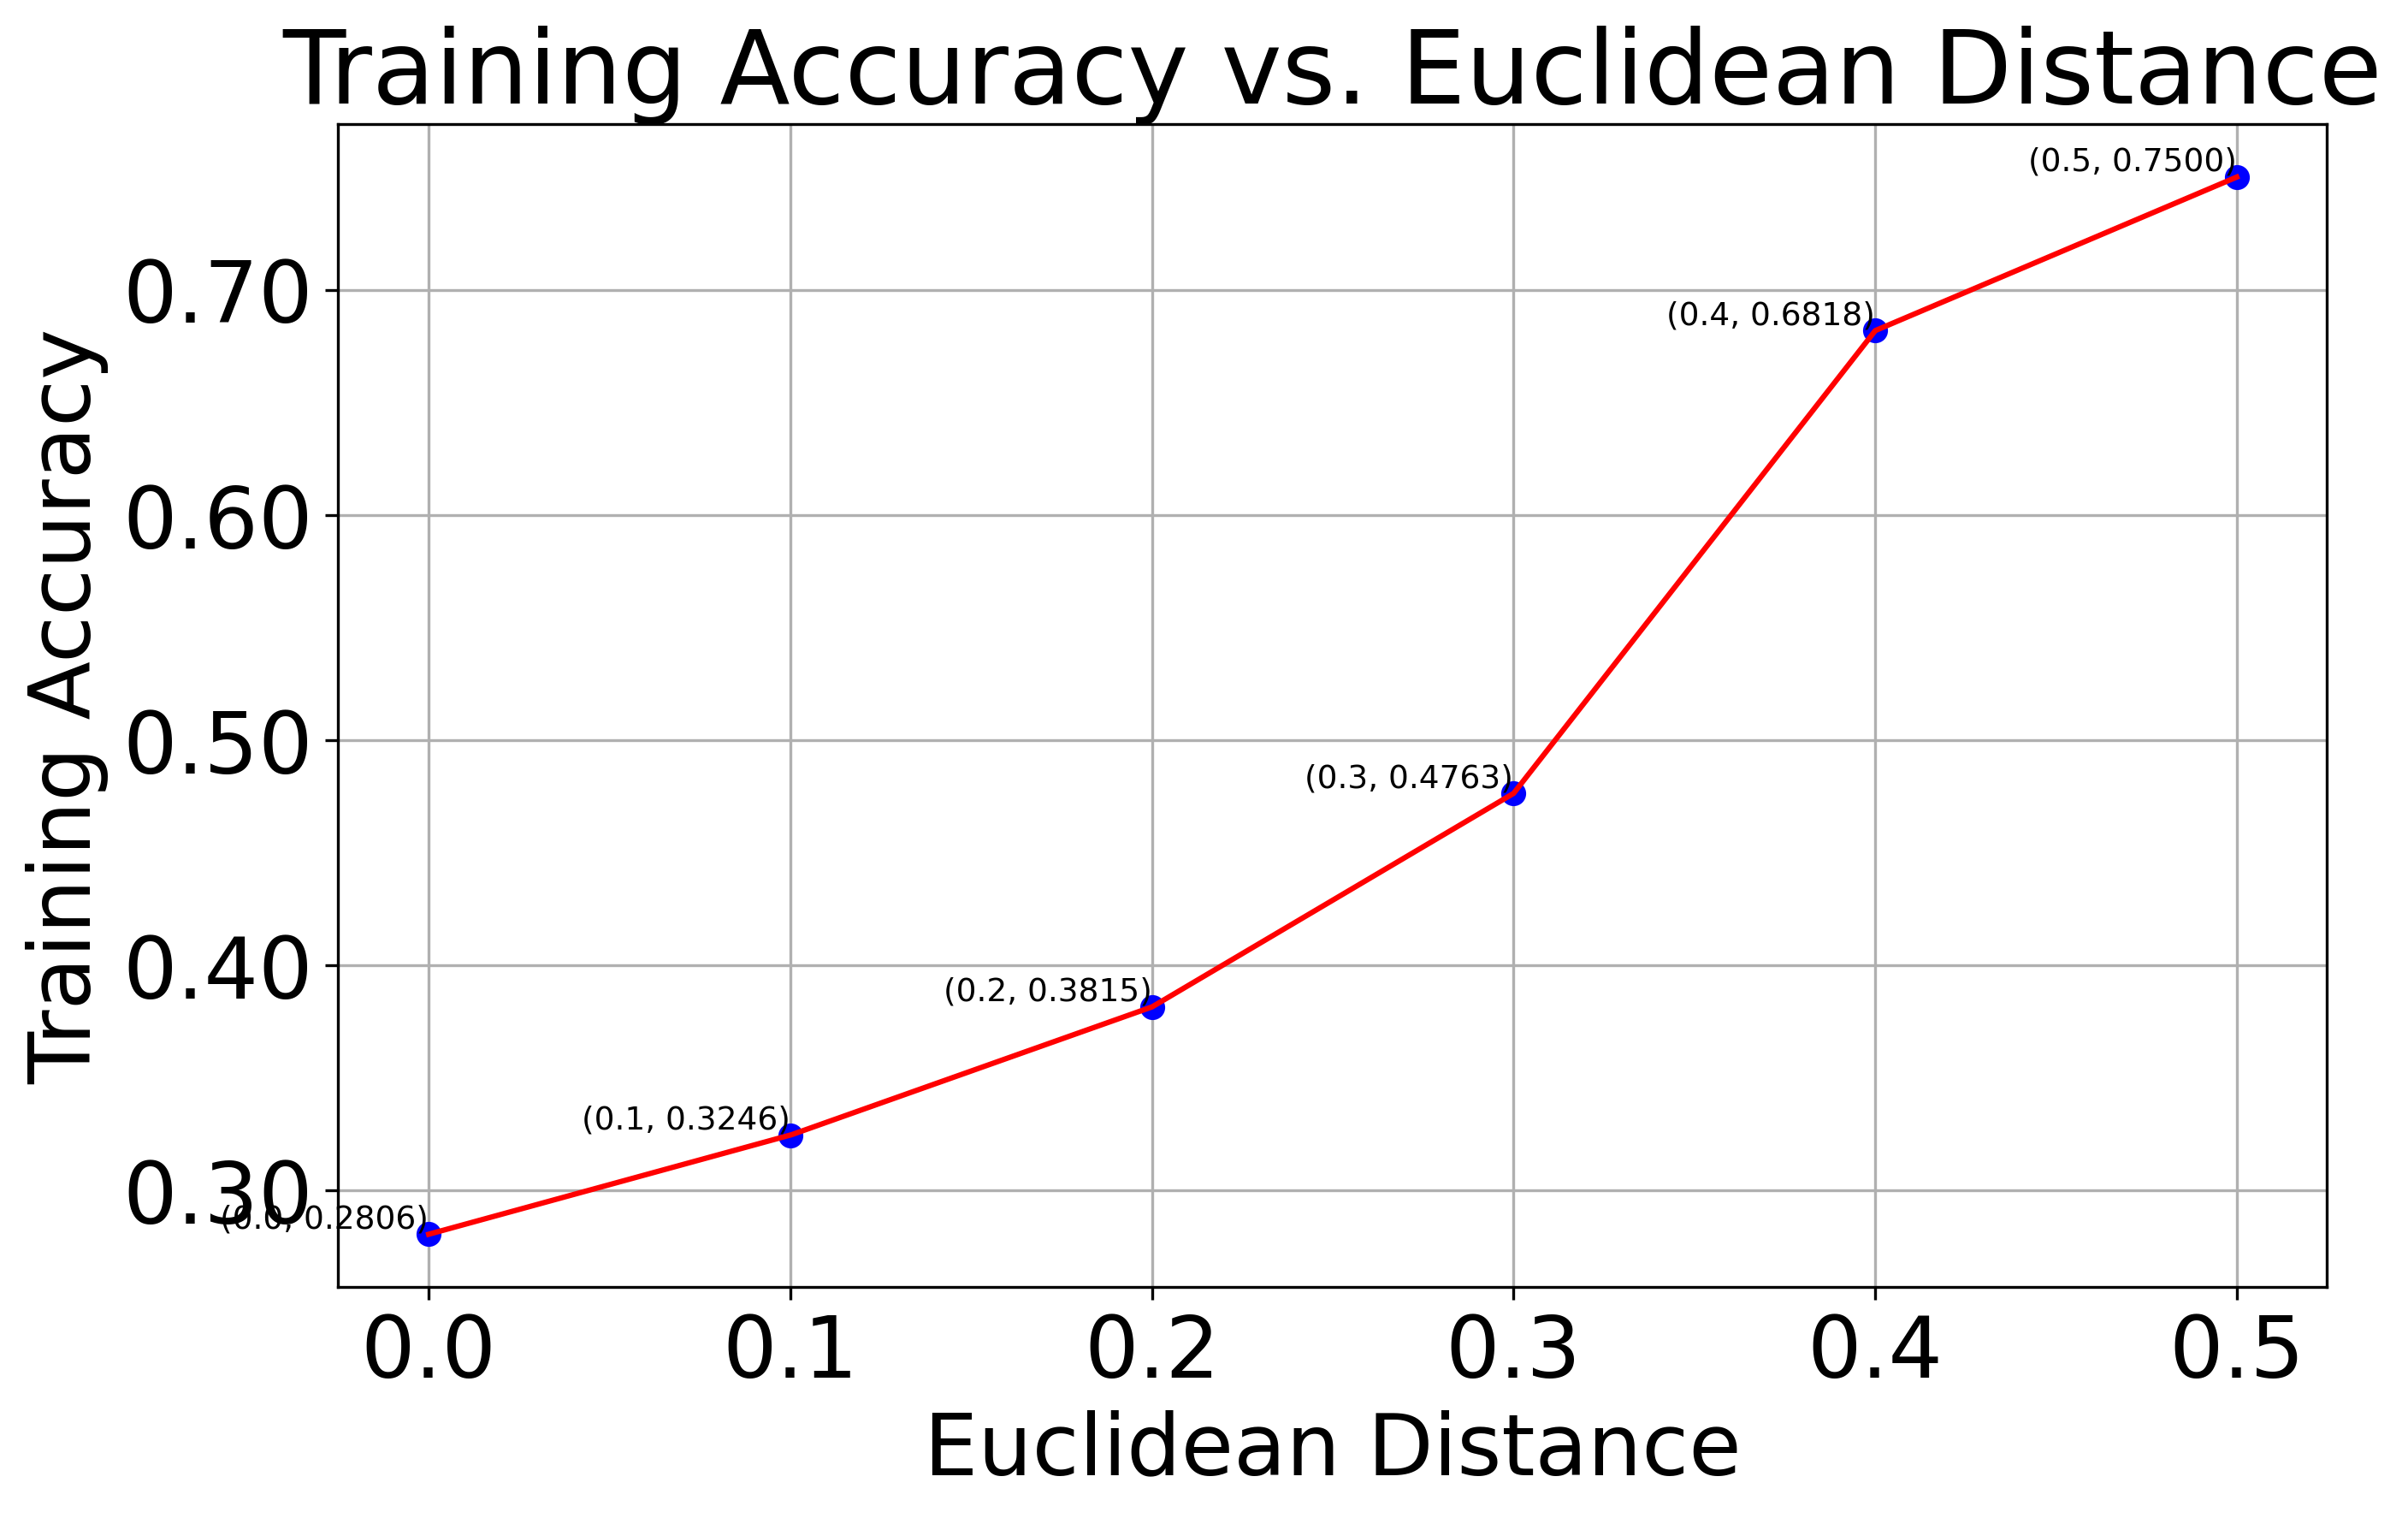

In [343]:
import numpy as np
import matplotlib.pyplot as plt

# Original data points
x_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
y_values = [0.2806, 0.3246, 0.3815, 0.4763, 0.6818, 0.7500]

# Generate more x values using linspace
x_fine = np.linspace(min(x_values), max(x_values), 10000)

# Interpolate y values for the new x values
y_fine = np.interp(x_fine, x_values, y_values)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, 'o', label='Original Data', color='b')
plt.plot(x_fine, y_fine, '-', label='Interpolated Line', color='r')

# Format y-axis to show four decimal places
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

# Annotate the original data points
for (x, y) in zip(x_values, y_values):
    plt.text(x, y, f'({x:.1f}, {y:.4f})', fontsize=9, ha='right', va='bottom')

# Adding titles and labels
plt.title('Training Accuracy vs. Euclidean Distance')
plt.xlabel('Euclidean Distance')
plt.ylabel('Training Accuracy')
plt.grid(True)
#plt.legend()

# Show the plot
plt.show()
